findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f

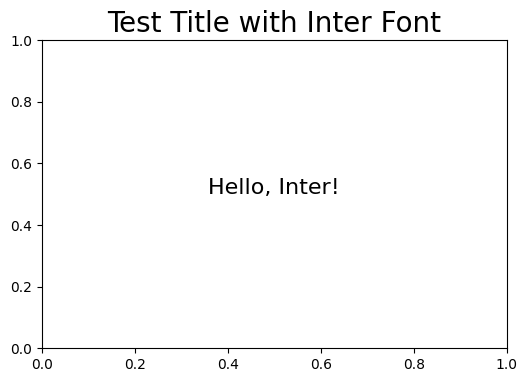

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import easyocr
import re
from pathlib import Path
from matplotlib import font_manager as fm

# Path to the Inter font file (adjust if needed)
inter_font_path = r'C:\Users\2004l\AppData\Local\Microsoft\Windows\Fonts\Inter-VariableFont_opsz,wght.ttf'

# Create a font property
inter_font = fm.FontProperties(fname=inter_font_path)

# Set the font globally for matplotlib
plt.rcParams['font.family'] = 'Inter'  # Or inter_font.get_name()

plt.figure(figsize=(6, 4))
plt.title('Test Title with Inter Font', fontsize=20)
plt.text(0.5, 0.5, 'Hello, Inter!', fontsize=16, ha='center')
plt.show()

In [2]:
# Load the floor plan image
image_path = Path('data/20230828_3_OG_mit_Raumnummern-1.png')
image = cv2.imread(str(image_path))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(f"Image shape: {image.shape}")
plt.figure(figsize=(15, 10))
plt.imshow(image_rgb)
plt.title('Original Floor Plan')
plt.axis('off')
plt.show()

findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.


Image shape: (3351, 9925, 3)


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.


In [3]:
# Initialize EasyOCR reader (first time will download language model)
# Using English and German language models for better detection
reader = easyocr.Reader(['en', 'de'], gpu=False)

# Convert to grayscale for better OCR
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply preprocessing to enhance text detection
# 1. Increase contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(gray)

# 2. Apply slight blur to reduce noise
denoised = cv2.bilateralFilter(enhanced, 9, 75, 75)

# Use EasyOCR with enhanced image - use detail=1 for more accurate bounding boxes
ocr_results = reader.readtext(denoised, detail=1, paragraph=False, 
                              min_size=10, text_threshold=0.5, 
                              low_text=0.3, link_threshold=0.3)

print(f"Total text elements detected: {len(ocr_results)}")

# Display all detected text for debugging
print("\nAll detected text:")
for bbox, text, conf in ocr_results:
    print(f"  '{text}' (confidence: {conf:.2f})")

Using CPU. Note: This module is much faster with a GPU.
c:\Users\2004l\Desktop\floor-plan-to-graph-conversion\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Total text elements detected: 70

All detected text:
  'HW 3 .Obergeschoss' (confidence: 0.69)
  'Büro' (confidence: 0.63)
  'Büro' (confidence: 1.00)
  'Büro' (confidence: 1.00)
  'Büro' (confidence: 1.00)
  'Büro' (confidence: 1.00)
  'R_HW_3.13' (confidence: 0.62)
  'R_HW_3.14' (confidence: 0.89)
  'R_HW_3.15' (confidence: 0.74)
  'R_HW_3.11' (confidence: 0.97)
  'R_HW_3.12' (confidence: 0.88)
  '9,96 m?' (confidence: 0.47)
  '9,78 m?' (confidence: 0.92)
  '15,49 m?' (confidence: 0.91)
  '48,44 m?' (confidence: 0.90)
  '30,47 m?' (confidence: 0.98)
  'K.3.09' (confidence: 0.84)
  'K.3.10' (confidence: 0.85)
  'K.3.11' (confidence: 0.78)
  'K.3.12' (confidence: 0.97)
  'K.3.13' (confidence: 0.95)
  'K3.o8' (confidence: 0.75)
  'Büro' (confidence: 1.00)
  'Techni_3.10' (confidence: 0.28)
  'Flur' (confidence: 1.00)
  'K.3.01' (confidence: 0.69)
  'R_HW_3.16' (confidence: 0.98)
  'K.3.14' (confidence: 0.95)
  '1,92 m?' (confidence: 0.80)
  'F_HW_3.2' (confidence: 0.95)
  '131,57 m?' (c

In [4]:
# Define the pattern for room labels: Letter.Number.Number(s)
# Making it more flexible to catch variations
pattern = re.compile(r'^[A-Z][\.\s]*[0-9]+[\.\s]*[0-9]+$')

# Find all text matching the pattern and store their center positions
room_labels = []

for detection in ocr_results:
    bbox, text, conf = detection
    # Clean up the text - remove extra spaces
    text_original = text.strip()
    text = text.replace(' ', '').replace('\n', '')
    
    # Filter by confidence and pattern match (lower threshold for better detection)
    if conf > 0.1 and pattern.match(text):
        # bbox is list of 4 points: [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]
        # Convert to numpy array for easier calculation
        bbox_array = np.array(bbox)
        
        # Calculate bounding box in (x, y, w, h) format
        x_coords = bbox_array[:, 0]
        y_coords = bbox_array[:, 1]
        x = int(x_coords.min())
        y = int(y_coords.min())
        w = int(x_coords.max() - x)
        h = int(y_coords.max() - y)
        
        # Calculate center position
        center_x = x + w // 2
        center_y = y + h // 2
        
        room_labels.append({
            'text': text,
            'center': (center_x, center_y),
            'bbox': (x, y, w, h),
            'confidence': conf
        })

print(f"Found {len(room_labels)} room labels matching pattern:")
for label in room_labels:
    print(f"  {label['text']} at position {label['center']} (confidence: {label['confidence']:.2f})")

Found 13 room labels matching pattern:
  K.3.09 at position (887, 778) (confidence: 0.84)
  K.3.10 at position (2655, 763) (confidence: 0.85)
  K.3.11 at position (3783, 701) (confidence: 0.78)
  K.3.12 at position (4349, 732) (confidence: 0.97)
  K.3.13 at position (4946, 740) (confidence: 0.95)
  K.3.01 at position (4946, 1244) (confidence: 0.69)
  K.3.14 at position (8300, 1282) (confidence: 0.95)
  K.3.00 at position (5718, 1903) (confidence: 0.93)
  K.3.07 at position (922, 2027) (confidence: 0.87)
  K.3.02 at position (4783, 2035) (confidence: 0.94)
  K.3.06 at position (2337, 2089) (confidence: 0.89)
  K.3.05 at position (3260, 2120) (confidence: 0.91)
  K.3.15 at position (8691, 2414) (confidence: 0.40)


In [5]:
# Visualize detected room labels
vis_image = image_rgb.copy()

for label in room_labels:
    x, y, w, h = label['bbox']
    center_x, center_y = label['center']
    
    # Draw bounding box
    cv2.rectangle(vis_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    # Draw center point
    cv2.circle(vis_image, (center_x, center_y), 5, (255, 0, 0), -1)
    
    # Add label text
    cv2.putText(vis_image, label['text'], (x, y - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

plt.figure(figsize=(15, 10))
plt.imshow(vis_image)
plt.title('Detected Room Labels')
plt.axis('off')
plt.show()

findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.


In [6]:
# Prepare image for flood fill - use grayscale directly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print("Analyzing image brightness...")
print(f"Mean: {gray.mean():.1f}, Std: {gray.std():.1f}")
print(f"Min: {gray.min()}, Max: {gray.max()}")

# Use grayscale for flood fill
binary = gray.copy()

plt.figure(figsize=(15, 10))
plt.imshow(binary, cmap='gray')
plt.title('Grayscale Image (Used for Flood Fill)')
plt.axis('off')
plt.show()

Analyzing image brightness...


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.


Mean: 246.9, Std: 41.8
Min: 0, Max: 255


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.


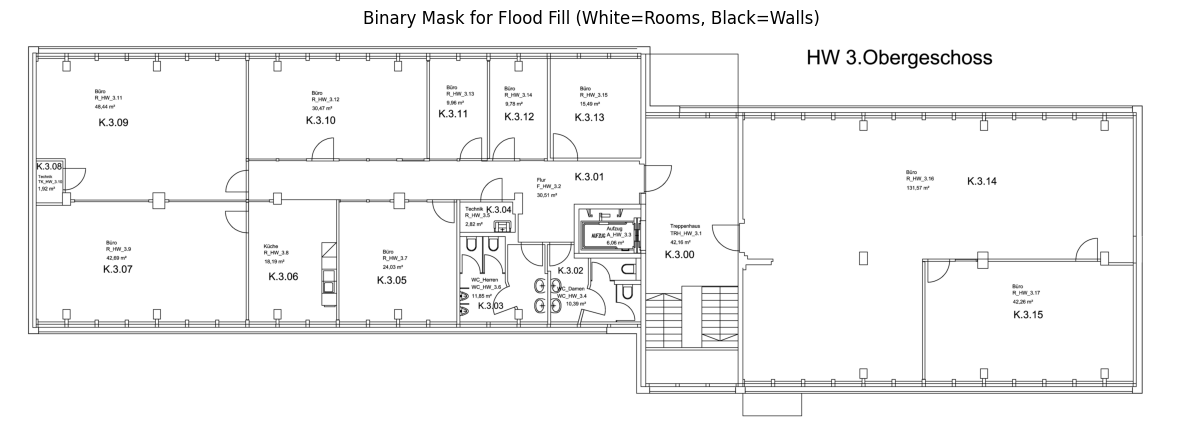

Starting flood fill for each detected room...

Processing room K.3.09 at (887, 778)...
  Pixel value at seed point: 255
  ✓ Successfully filled 1971048 pixels with color (200, 0, 0)
Processing room K.3.10 at (2655, 763)...
  Pixel value at seed point: 255
  ✓ Successfully filled 1239683 pixels with color (200, 87, 0)
Processing room K.3.11 at (3783, 701)...
  Pixel value at seed point: 255
  ✓ Successfully filled 378968 pixels with color (200, 180, 0)
Processing room K.3.12 at (4349, 732)...
  Pixel value at seed point: 255
  ✓ Successfully filled 371155 pixels with color (127, 200, 0)
Processing room K.3.13 at (4946, 740)...
  Pixel value at seed point: 255
  ✓ Successfully filled 603727 pixels with color (33, 200, 0)
Processing room K.3.01 at (4946, 1244)...
  Pixel value at seed point: 255
  ✓ Successfully filled 1235522 pixels with color (0, 200, 60)
Processing room K.3.14 at (8300, 1282)...
  Pixel value at seed point: 255
  ✓ Successfully filled 5485283 pixels with color (0, 200,

In [7]:
# Create segmented image with unique colors for each room
segmented_image = image_rgb.copy()

# Generate unique, distinct colors for each room
np.random.seed(42)
colors = []
for i in range(len(room_labels)):
    # Use HSV color space for more distinct colors
    hue = int(180 * i / max(len(room_labels), 1))
    hsv_color = np.uint8([[[hue, 255, 200]]])
    rgb_color = cv2.cvtColor(hsv_color, cv2.COLOR_HSV2RGB)[0][0]
    colors.append(tuple(map(int, rgb_color)))

# Create a proper binary mask for flood fill - walls should be black (0), rooms white (255)
gray_for_fill = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use a higher threshold to ensure walls are truly black
# Walls are usually darker, rooms are white/light
_, binary_strict = cv2.threshold(gray_for_fill, 240, 255, cv2.THRESH_BINARY)

# Apply morphological operations to ensure walls are continuous
kernel = np.ones((2,2), np.uint8)
binary_strict = cv2.morphologyEx(binary_strict, cv2.MORPH_CLOSE, kernel, iterations=1)

# Invert for visualization
plt.figure(figsize=(15, 10))
plt.imshow(binary_strict, cmap='gray')
plt.title('Binary Mask for Flood Fill (White=Rooms, Black=Walls)')
plt.axis('off')
plt.show()

# Apply flood fill from each room label center
filled_rooms = []
all_masks = []

print("Starting flood fill for each detected room...\n")

for idx, label in enumerate(room_labels):
    center_x, center_y = label['center']
    
    print(f"Processing room {label['text']} at ({center_x}, {center_y})...")
    
    # Check the pixel value at seed point
    pixel_value = binary_strict[center_y, center_x]
    print(f"  Pixel value at seed point: {pixel_value}")
    
    # Create a copy for this specific flood fill
    mask = np.zeros((binary_strict.shape[0] + 2, binary_strict.shape[1] + 2), np.uint8)
    flood_fill_image = binary_strict.copy()
    
    # If the seed point is not white enough, try to find nearby white pixel
    search_radius = 30
    found_seed = False
    
    if pixel_value < 240:
        print(f"  Seed point too dark ({pixel_value}), searching nearby...")
        best_pixel = 0
        best_pos = None
        
        for dy in range(-search_radius, search_radius, 3):
            for dx in range(-search_radius, search_radius, 3):
                ny, nx = center_y + dy, center_x + dx
                if 0 <= ny < binary_strict.shape[0] and 0 <= nx < binary_strict.shape[1]:
                    pv = binary_strict[ny, nx]
                    if pv > best_pixel:
                        best_pixel = pv
                        best_pos = (nx, ny)
                        if pv == 255:
                            found_seed = True
                            break
            if found_seed:
                break
        
        if best_pos and best_pixel >= 240:
            center_x, center_y = best_pos
            print(f"  Found better seed at ({center_x}, {center_y}) with value {best_pixel}")
            found_seed = True
    else:
        found_seed = True
    
    if found_seed and binary_strict[center_y, center_x] >= 240:
        # Flood fill parameters - strict boundaries, NO tolerance
        connectivity = 4  # 4-connected to avoid diagonal bleeding
        flags = connectivity | cv2.FLOODFILL_MASK_ONLY | (255 << 8)
        
        # Perform flood fill with ZERO tolerance to respect edges exactly
        num_filled = cv2.floodFill(flood_fill_image, mask, (center_x, center_y), 255, 
                                   loDiff=5, upDiff=5, flags=flags)
        
        # Extract the filled region (remove padding from mask)
        filled_region = mask[1:-1, 1:-1].copy()
        all_masks.append(filled_region)
        
        area = np.sum(filled_region == 255)
        
        if area > 100:  # Only count if area is significant
            # Color the region in the segmented image
            color = colors[idx]
            for c in range(3):
                segmented_image[:, :, c][filled_region == 255] = color[c]
            
            filled_rooms.append({
                'label': label['text'],
                'color': color,
                'area': area,
                'center': (center_x, center_y)
            })
            
            print(f"  ✓ Successfully filled {area} pixels with color {color}")
        else:
            print(f"  ✗ Filled area too small ({area} pixels), skipping")
    else:
        print(f"  ✗ Could not find valid seed point (not in white area)")

print(f"\n{'='*60}")
print(f"Successfully segmented {len(filled_rooms)} out of {len(room_labels)} detected rooms")
print(f"{'='*60}")

In [8]:
plt.figure(figsize=(23.4, 6.35), dpi=1000)  # A1 landscape at 300 DPI
plt.imshow(segmented_image)
plt.axis('off')

plt.tight_layout(pad=1.0)
plt.show()

findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.


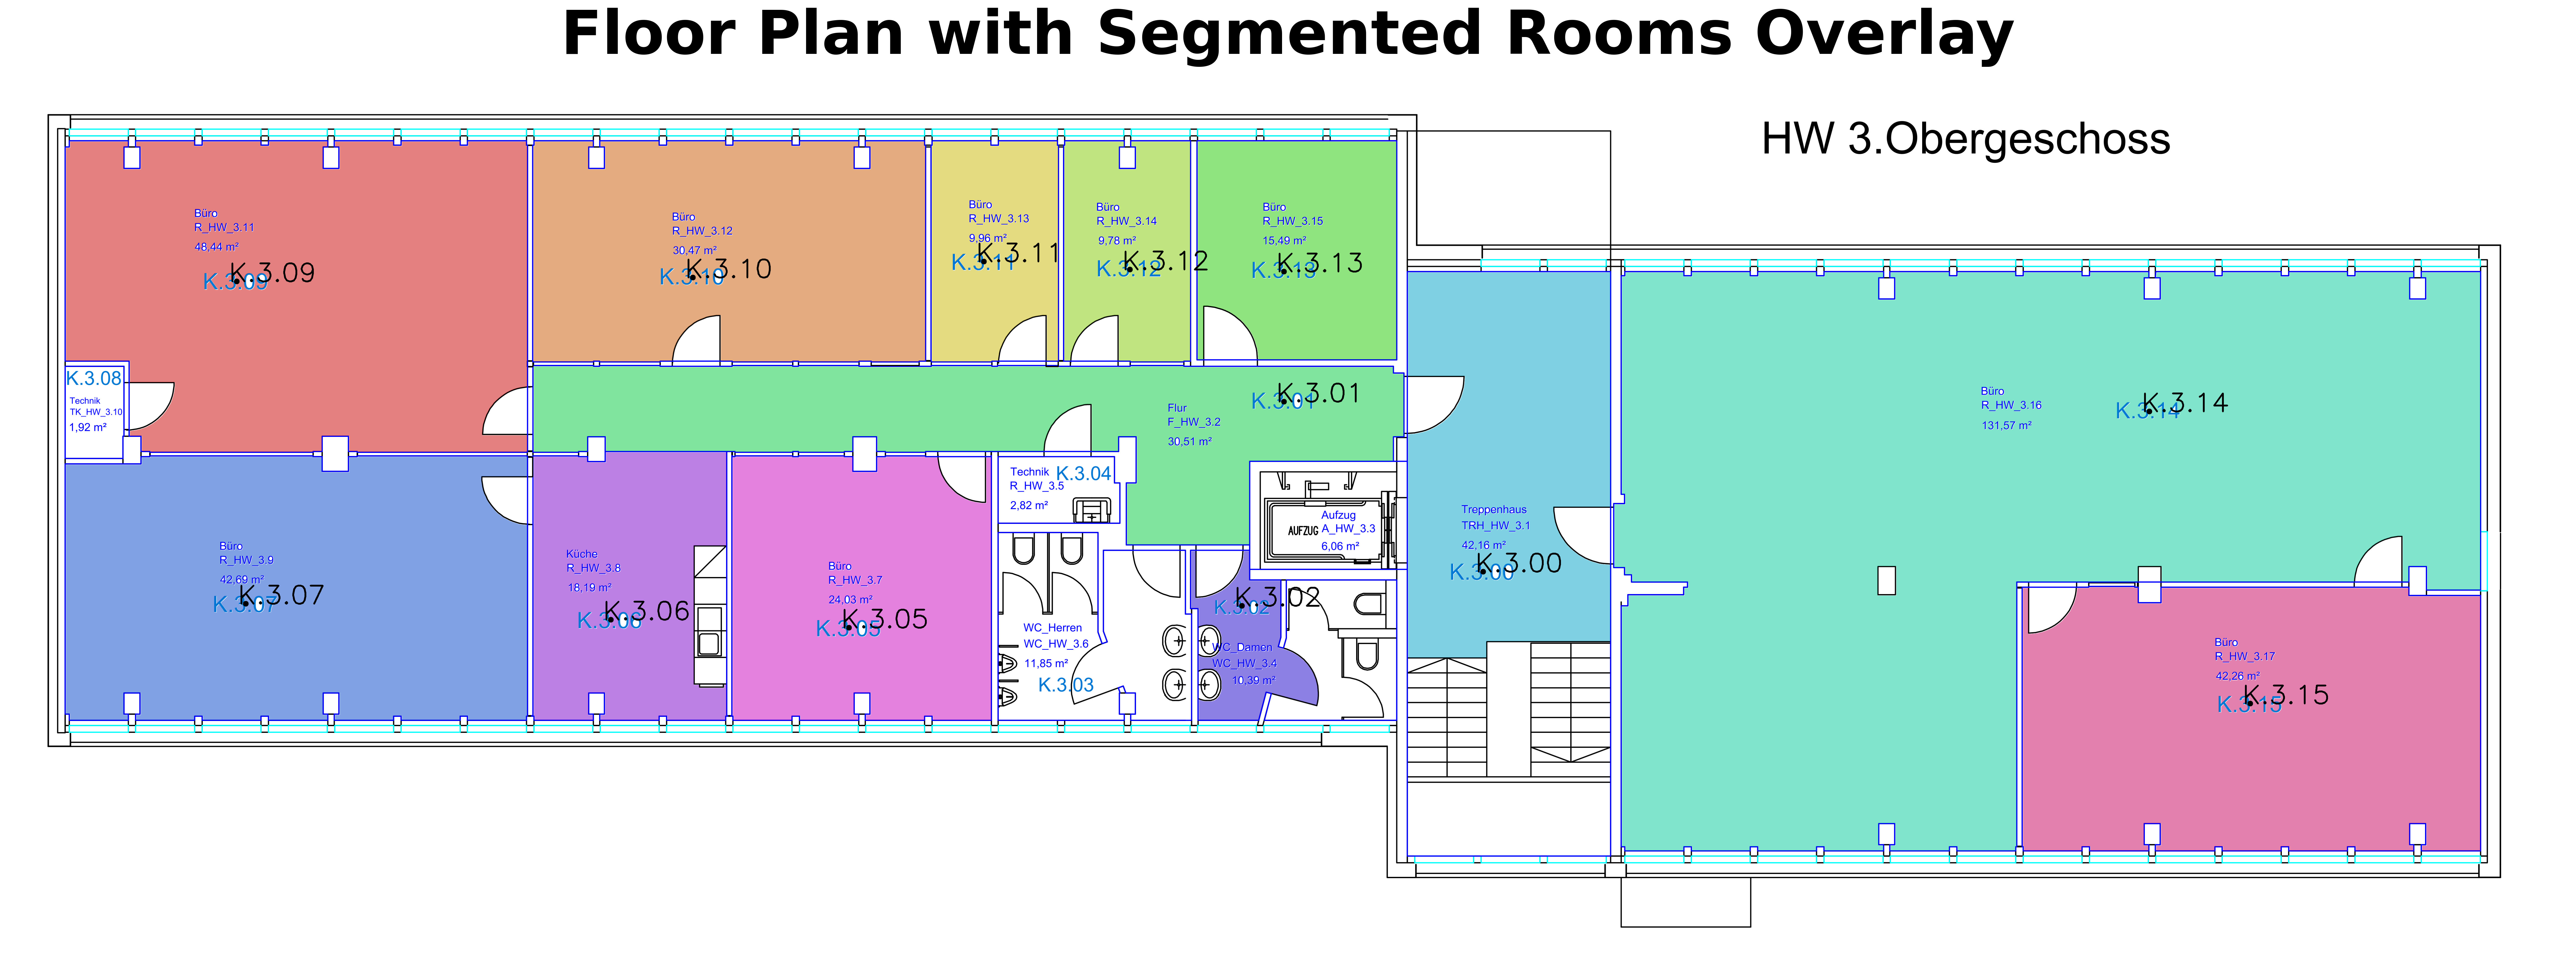

In [9]:
# Create overlay: blend original image with segmented regions
# ULTRA HIGH RESOLUTION VERSION FOR A1 POSTER
alpha = 0.5  # Transparency factor
overlay = cv2.addWeighted(image_rgb, 1 - alpha, segmented_image, alpha, 0)

# Add room labels to the overlay with larger font for poster
for label in room_labels:
    center_x, center_y = label['center']
    # Scale font size based on image resolution
    font_scale = max(1.2, image.shape[0] / 1000)
    thickness = max(3, int(image.shape[0] / 500))
    cv2.putText(overlay, label['text'], (center_x - 30, center_y), 
                cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), thickness)
    cv2.circle(overlay, (center_x, center_y), max(5, int(image.shape[0] / 300)), (0, 0, 0), -1)

# Display in maximum quality for A1 poster
plt.figure(figsize=(33.1, 23.4), dpi=300)  # A1 landscape at 300 DPI
plt.imshow(overlay)
plt.title('Floor Plan with Segmented Rooms Overlay', fontsize=56, pad=25, fontfamily='Inter', fontweight='extra bold')
plt.axis('off')
plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.96, bottom=0.04)
plt.show()

In [10]:
# Save the results
output_path = Path('data/segmented_floor_plan.png')
overlay_bgr = cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR)
cv2.imwrite(str(output_path), overlay_bgr)
print(f"Saved segmented floor plan to: {output_path}")

# Print summary statistics
print("\nRoom Segmentation Summary:")
print("=" * 50)
for room in filled_rooms:
    print(f"Room {room['label']}: {room['area']} pixels")

Saved segmented floor plan to: data\segmented_floor_plan.png

Room Segmentation Summary:
Room K.3.09: 1971048 pixels
Room K.3.10: 1239683 pixels
Room K.3.11: 378968 pixels
Room K.3.12: 371155 pixels
Room K.3.13: 603727 pixels
Room K.3.01: 1235522 pixels
Room K.3.14: 5485283 pixels
Room K.3.00: 1044692 pixels
Room K.3.07: 1753657 pixels
Room K.3.02: 155841 pixels
Room K.3.06: 678047 pixels
Room K.3.05: 968466 pixels
Room K.3.15: 1736254 pixels


In [11]:
from PIL import Image

# Load the image
image_path = Path('data/image.png')
image = Image.open(image_path).convert("RGBA")  # Ensure image has an alpha channel

# Convert to numpy array for pixel manipulation
image_data = np.array(image)

# Set black pixels (0, 0, 0) to transparent
black_pixels = (image_data[:, :, 0] == 0) & (image_data[:, :, 1] == 0) & (image_data[:, :, 2] == 0)
image_data[black_pixels, 3] = 0  # Set alpha channel to 0 for transparency

# Save the result
output_path = Path('data/image_transparent.png')
Image.fromarray(image_data).save(output_path)

print(f"Saved transparent image to: {output_path}")

c:\Users\2004l\Desktop\floor-plan-to-graph-conversion\.venv\Lib\site-packages\PIL\Image.py:3432: DecompressionBombWarning: Image size (114050048 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Saved transparent image to: data\image_transparent.png


In [12]:
# First, let's rebuild the room masks and create a labeled image
# This will be the foundation for door detection

import networkx as nx
from scipy import ndimage
from collections import defaultdict
from itertools import combinations

# Reload necessary data
image_path = Path('data/20230828_3_OG_mit_Raumnummern-1.png')
image = cv2.imread(str(image_path))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a labeled image where each room has a unique integer ID
labeled_image = np.zeros(image.shape[:2], dtype=np.int32)

# Dictionary to map room labels to IDs
room_id_map = {}
room_masks = {}

print("Rebuilding room masks for door detection...\n")

# Regenerate masks using the same flood fill approach
gray_for_fill = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_strict = cv2.threshold(gray_for_fill, 240, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,2), np.uint8)
binary_strict = cv2.morphologyEx(binary_strict, cv2.MORPH_CLOSE, kernel, iterations=1)

for idx, label in enumerate(room_labels):
    room_id = idx + 1  # IDs start from 1 (0 is background/walls)
    center_x, center_y = label['center']
    
    # Find valid seed point
    pixel_value = binary_strict[center_y, center_x]
    search_radius = 30
    
    if pixel_value < 240:
        best_pixel = 0
        best_pos = None
        for dy in range(-search_radius, search_radius, 3):
            for dx in range(-search_radius, search_radius, 3):
                ny, nx = center_y + dy, center_x + dx
                if 0 <= ny < binary_strict.shape[0] and 0 <= nx < binary_strict.shape[1]:
                    pv = binary_strict[ny, nx]
                    if pv > best_pixel:
                        best_pixel = pv
                        best_pos = (nx, ny)
        if best_pos and best_pixel >= 240:
            center_x, center_y = best_pos
    
    if binary_strict[center_y, center_x] >= 240:
        mask = np.zeros((binary_strict.shape[0] + 2, binary_strict.shape[1] + 2), np.uint8)
        flood_fill_image = binary_strict.copy()
        
        flags = 4 | cv2.FLOODFILL_MASK_ONLY | (255 << 8)
        cv2.floodFill(flood_fill_image, mask, (center_x, center_y), 255, 
                      loDiff=5, upDiff=5, flags=flags)
        
        filled_region = mask[1:-1, 1:-1].copy()
        area = np.sum(filled_region == 255)
        
        if area > 100:
            labeled_image[filled_region == 255] = room_id
            room_id_map[label['text']] = room_id
            room_masks[label['text']] = filled_region
            print(f"Room {label['text']} -> ID {room_id} (area: {area} pixels)")

print(f"\nTotal rooms mapped: {len(room_id_map)}")
print(f"Room ID mapping: {room_id_map}")

Rebuilding room masks for door detection...

Room K.3.09 -> ID 1 (area: 1971048 pixels)
Room K.3.10 -> ID 2 (area: 1239683 pixels)
Room K.3.11 -> ID 3 (area: 378968 pixels)
Room K.3.12 -> ID 4 (area: 371155 pixels)
Room K.3.13 -> ID 5 (area: 603727 pixels)
Room K.3.01 -> ID 6 (area: 1235522 pixels)
Room K.3.14 -> ID 7 (area: 5485283 pixels)


Room K.3.00 -> ID 8 (area: 1044692 pixels)
Room K.3.07 -> ID 9 (area: 1753657 pixels)
Room K.3.02 -> ID 10 (area: 155841 pixels)
Room K.3.06 -> ID 11 (area: 678047 pixels)
Room K.3.05 -> ID 12 (area: 968466 pixels)
Room K.3.15 -> ID 13 (area: 1736254 pixels)

Total rooms mapped: 13
Room ID mapping: {'K.3.09': 1, 'K.3.10': 2, 'K.3.11': 3, 'K.3.12': 4, 'K.3.13': 5, 'K.3.01': 6, 'K.3.14': 7, 'K.3.00': 8, 'K.3.07': 9, 'K.3.02': 10, 'K.3.06': 11, 'K.3.05': 12, 'K.3.15': 13}


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f

findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.


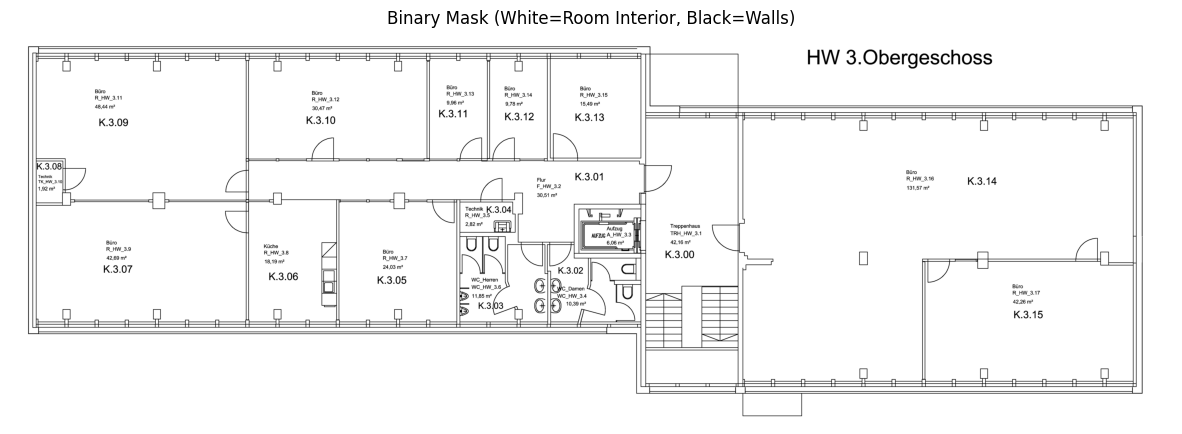

In [13]:
# Visualize the labeled image
plt.figure(figsize=(15, 10))
plt.imshow(labeled_image, cmap='tab20')
plt.colorbar(label='Room ID')
plt.title('Labeled Rooms (Each room has unique ID)')
plt.axis('off')
plt.show()

# Show the binary mask used for analysis
plt.figure(figsize=(15, 10))
plt.imshow(binary_strict, cmap='gray')
plt.title('Binary Mask (White=Room Interior, Black=Walls)')
plt.axis('off')
plt.show()

In [14]:
# STEP 1: Extract boundary contour for each room
# We need to get the edge/contour of each room's mask

def get_room_contour(mask):
    """Extract the outer contour of a room mask."""
    # Ensure binary mask
    binary_mask = (mask > 0).astype(np.uint8) * 255
    
    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    if contours:
        # Return the largest contour (main room boundary)
        return max(contours, key=cv2.contourArea)
    return None

# Get contours for all rooms
room_contours = {}
for room_label, mask in room_masks.items():
    contour = get_room_contour(mask)
    if contour is not None:
        room_contours[room_label] = contour
        print(f"Room {room_label}: contour has {len(contour)} points")

print(f"\nExtracted contours for {len(room_contours)} rooms")

Room K.3.09: contour has 7250 points
Room K.3.10: contour has 5652 points
Room K.3.11: contour has 2949 points
Room K.3.12: contour has 3199 points
Room K.3.13: contour has 3513 points
Room K.3.01: contour has 8820 points
Room K.3.14: contour has 13766 points
Room K.3.00: contour has 5161 points
Room K.3.07: contour has 6640 points
Room K.3.02: contour has 2725 points
Room K.3.06: contour has 4182 points
Room K.3.05: contour has 4739 points
Room K.3.15: contour has 6614 points

Extracted contours for 13 rooms


In [15]:
# Visualize room contours
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
axes = axes.flatten()

# Pick a few rooms to visualize their contours
sample_rooms = list(room_contours.keys())[:6]

for idx, room_label in enumerate(sample_rooms):
    ax = axes[idx]
    contour = room_contours[room_label]
    mask = room_masks[room_label]
    
    # Show mask with contour overlay
    display_img = cv2.cvtColor((mask > 0).astype(np.uint8) * 100, cv2.COLOR_GRAY2RGB)
    cv2.drawContours(display_img, [contour], -1, (255, 0, 0), 3)
    
    ax.imshow(display_img)
    ax.set_title(f'Room {room_label}\nContour: {len(contour)} points')
    ax.axis('off')

plt.suptitle('Room Boundary Contours', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f

In [16]:
# STEP 2: Find neighboring rooms by expanding each room's mask
# Dilate each room's mask by N pixels, then check what other room labels overlap

def find_neighboring_rooms_by_expansion(room_masks, labeled_image, room_id_map, expansion_size=80):
    """
    Find neighboring rooms by expanding each room's mask and checking for overlaps.
    
    For each room:
    1. Take its binary mask
    2. Dilate/expand it by expansion_size pixels
    3. Look at the labeled_image where this expanded mask is
    4. Any room labels that appear (except itself) are neighbors
    
    This is much more reliable than searching outward from contour.
    """
    room_neighbors = {}
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (expansion_size, expansion_size))
    
    # Create reverse mapping: room_id -> room_label
    room_id_to_label = {v: k for k, v in room_id_map.items()}
    
    for room_label, mask in room_masks.items():
        # Get the room ID for this label
        room_id = room_id_map.get(room_label)
        if room_id is None:
            continue
        
        # Dilate this room's mask
        binary_mask = (mask > 0).astype(np.uint8) * 255
        dilated = cv2.dilate(binary_mask, kernel, iterations=1)
        
        # Find what room labels appear in the dilated region
        neighbor_labels = set()
        dilated_region = dilated > 0
        labels_in_dilated = labeled_image[dilated_region]
        
        unique_labels = np.unique(labels_in_dilated)
        
        for label_id in unique_labels:
            if label_id == 0 or label_id == room_id:
                continue  # Skip background and self
            
            neighbor_label = room_id_to_label.get(label_id)
            if neighbor_label:
                neighbor_labels.add(neighbor_label)
        
        room_neighbors[room_label] = list(neighbor_labels)
    
    return room_neighbors

# Find neighbors using mask expansion
room_neighbors = find_neighboring_rooms_by_expansion(room_masks, labeled_image, room_id_map, expansion_size=80)

print("=" * 70)
print("NEIGHBORING ROOMS (by mask expansion)")
print("=" * 70)
print()

for room_label in sorted(room_neighbors.keys()):
    neighbors = room_neighbors[room_label]
    if neighbors:
        neighbor_str = ", ".join(sorted(neighbors))
        print(f"{room_label}: {neighbor_str}")
    else:
        print(f"{room_label}: (no neighbors)")

NEIGHBORING ROOMS (by mask expansion)

K.3.00: K.3.01, K.3.14
K.3.01: K.3.00, K.3.02, K.3.05, K.3.06, K.3.07, K.3.09, K.3.10, K.3.11, K.3.12, K.3.13
K.3.02: K.3.01
K.3.05: K.3.01, K.3.06
K.3.06: K.3.01, K.3.05, K.3.07, K.3.09
K.3.07: K.3.01, K.3.06, K.3.09
K.3.09: K.3.01, K.3.06, K.3.07, K.3.10
K.3.10: K.3.01, K.3.09, K.3.11
K.3.11: K.3.01, K.3.10, K.3.12
K.3.12: K.3.01, K.3.11, K.3.13
K.3.13: K.3.01, K.3.12
K.3.14: K.3.00, K.3.15
K.3.15: K.3.14


In [17]:
# STEP 2.5: Calculate SIGNED curvature along each room's contour
# For door detection, we need SIGNED curvature to distinguish concave (doors) from convex (walls)

def calculate_contour_curvature(contour, window_size=20):
    """
    Calculate SIGNED, NORMALIZED curvature at each point along a contour.
    
    Returns values in range [-1, 1]:
    - Positive values (0 to 1): CONCAVE curves (inward) = DOORS
    - Negative values (-1 to 0): CONVEX curves (outward) = CONVEX WALLS
    - Values near 0: FLAT sections = WALLS
    
    For door detection, we filter for positive values in range [0.05, 0.5]
    which represent smooth inward curves (door openings).
    """
    points = contour.reshape(-1, 2).astype(np.float32)
    n = len(points)
    
    if n < 3:
        return np.zeros(n)
    
    curvature = np.zeros(n)
    
    # For each point, calculate SIGNED curvature from surrounding points
    for i in range(n):
        # Get 3 consecutive points along the contour
        p1_idx = (i - window_size) % n
        p2_idx = i
        p3_idx = (i + window_size) % n
        
        p1 = points[p1_idx]
        p2 = points[p2_idx]
        p3 = points[p3_idx]
        
        # Vectors along the contour direction
        v1 = p2 - p1  # direction from p1 to p2
        v2 = p3 - p2  # direction from p2 to p3
        
        len1 = np.linalg.norm(v1)
        len2 = np.linalg.norm(v2)
        
        if len1 < 1e-6 or len2 < 1e-6:
            curvature[i] = 0
            continue
        
        # Normalize vectors
        v1_norm = v1 / len1
        v2_norm = v2 / len2
        
        # SIGNED angle change (preserves direction of turn)
        # Cross product to determine turn direction
        cross = v1_norm[0] * v2_norm[1] - v1_norm[1] * v2_norm[0]
        dot = np.dot(v1_norm, v2_norm)
        
        # Signed angle in radians
        # Positive angle = left turn (concave for rooms)
        # Negative angle = right turn (convex)
        signed_angle = np.arctan2(cross, dot)
        
        # Normalize to [-1, 1] range (divide by pi)
        curvature[i] = signed_angle / np.pi
    
    return curvature

# Calculate curvatures for all rooms
room_curvatures = {}

print("Calculating SIGNED contour curvatures for all rooms...\n")
print("Note: positive values = concave (doors), negative = convex\n")

for room_label, contour in room_contours.items():
    curvature = calculate_contour_curvature(contour, window_size=5)
    room_curvatures[room_label] = curvature
    
    # Statistics
    mean_curv = np.mean(curvature)
    max_curv = np.max(curvature)
    min_curv = np.min(curvature)
    pos_count = np.sum(curvature > 0.05)  # Concave regions
    neg_count = np.sum(curvature < -0.05)  # Convex regions
    
    print(f"{room_label}:")
    print(f"  Range: [{min_curv:.3f}, {max_curv:.3f}]")
    print(f"  Mean: {mean_curv:.3f}")
    print(f"  Concave points (>0.05): {pos_count}")
    print(f"  Convex points (<-0.05): {neg_count}")

print(f"\n✓ Calculated SIGNED curvatures for {len(room_curvatures)} rooms")


Calculating SIGNED contour curvatures for all rooms...

Note: positive values = concave (doors), negative = convex

K.3.09:
  Range: [-0.500, 0.437]
  Mean: -0.001
  Concave points (>0.05): 381
  Convex points (<-0.05): 360
K.3.10:
  Range: [-0.500, 0.437]
  Mean: -0.002
  Concave points (>0.05): 267
  Convex points (<-0.05): 270
K.3.11:
  Range: [-0.500, 0.437]
  Mean: -0.003
  Concave points (>0.05): 98
  Convex points (<-0.05): 111
K.3.12:
  Range: [-0.500, 0.437]
  Mean: -0.003
  Concave points (>0.05): 123
  Convex points (<-0.05): 133
K.3.13:
  Range: [-0.500, 0.379]
  Mean: -0.003
  Concave points (>0.05): 86
  Convex points (<-0.05): 99
K.3.01:
  Range: [-0.500, 0.437]
  Mean: -0.001
  Concave points (>0.05): 299
  Convex points (<-0.05): 302
K.3.14:
  Range: [-0.500, 0.437]
  Mean: -0.001
  Concave points (>0.05): 651
  Convex points (<-0.05): 603
K.3.00:
  Range: [-0.500, 0.437]
  Mean: -0.002
  Concave points (>0.05): 185
  Convex points (<-0.05): 174
K.3.07:
  Range: [-0.50

In [18]:
# STEP 3: Detect doors by finding CONCAVE arcs (positive curvature = inward curves)
# CORRECTED: Calculate jamb direction from the STRAIGHT part (low curvature), not from wall section

def detect_doors_by_sustained_curvature(room_label, room_contours, room_curvatures, room_masks, 
                                        room_id_map, labeled_image,
                                        curvature_strength_min=0.03,
                                        curvature_strength_max=0.1,
                                        min_arc_length=100,
                                        window_size=20,
                                        window_threshold=0.2,
                                        spike_tolerance=10,
                                        max_search_distance=300):
    """
    Detect doors by finding SUSTAINED CONCAVE curvature (positive signed curvature).
    
    Doors have TWO parts:
    1. ARC: Curved concave section (HIGH positive curvature) - the door opening
    2. JAMB: Straight perpendicular section (LOW/ZERO curvature) - goes into the wall
    
    CORRECT APPROACH:
    1. Find sustained positive curvature regions (arcs)
    2. For each arc, check BOTH ends to find which has the JAMB (low curvature)
    3. Calculate jamb direction from the straight section
    4. Walk from arc middle in jamb direction using ORIGINAL labeled_image
    5. First room found = connected room
    
    Parameters:
    - curvature_strength_min=0.03: Minimum positive curvature for door arc
    - curvature_strength_max=0.1: Maximum curvature for door arc
    - min_arc_length=100: Minimum arc length in pixels
    - window_size=20: Window for sustained region detection
    - window_threshold=0.2: At least 20% of window points in door range
    - spike_tolerance=10: Morphological closing to fill gaps
    - max_search_distance=300: Maximum distance to search for rooms
    """
    
    contour = room_contours[room_label]
    curvature = room_curvatures[room_label]
    points = contour.reshape(-1, 2)
    room_id = room_id_map[room_label]
    
    # Find regions with sustained POSITIVE curvature (concave = doors)
    in_door_range = (curvature >= curvature_strength_min) & (curvature <= curvature_strength_max)
    
    # Use sliding window to find sustained regions
    sustained_mask = np.zeros(len(curvature), dtype=bool)
    for i in range(len(curvature) - window_size):
        window_in_range = np.sum(in_door_range[i:i + window_size])
        if window_in_range >= window_size * window_threshold:
            sustained_mask[i:i + window_size] = True
    
    # Apply morphological closing to fill small gaps
    if spike_tolerance > 0:
        sustained_mask = ndimage.binary_closing(sustained_mask, structure=np.ones(spike_tolerance * 2 + 1))
    
    # Find contiguous regions
    labeled_arcs, num_arcs = ndimage.label(sustained_mask)
    
    detected_doors = []
    
    def walk_outward_and_find_room(start_point, direction, labeled_image, room_id, max_distance=300):
        """
        Walk from start_point in the given direction until we hit another room.
        Uses ORIGINAL labeled_image (not expanded masks) for precise detection.
        """
        for dist in range(5, max_distance, 2):
            check_point = start_point + dist * direction
            px, py = int(check_point[0]), int(check_point[1])
            
            # Check bounds
            if not (0 <= py < labeled_image.shape[0] and 0 <= px < labeled_image.shape[1]):
                continue
            
            label_at_point = labeled_image[py, px]
            
            # If we found a different room (not background, not ourselves)
            if label_at_point != 0 and label_at_point != room_id:
                # Convert room ID to room label
                for room_label_found, rid in room_id_map.items():
                    if rid == label_at_point:
                        return room_label_found, dist, check_point
        
        return None, None, None
    
    for arc_id in range(1, num_arcs + 1):
        arc_indices = np.where(labeled_arcs == arc_id)[0]
        
        if len(arc_indices) < 3:
            continue
        
        arc_start_idx = arc_indices[0]
        arc_end_idx = arc_indices[-1]
        arc_middle_idx = (arc_start_idx + arc_end_idx) // 2
        
        # Calculate arc length
        arc_length = 0
        for i in range(arc_start_idx, min(arc_end_idx, len(points) - 1)):
            p1 = points[i]
            p2 = points[i + 1]
            arc_length += np.linalg.norm(p2 - p1)
        
        # Filter by minimum arc length
        if arc_length < min_arc_length:
            continue
        
        # ========================================================================
        # FIND THE JAMB: Check curvature at BOTH ends of the arc
        # The jamb is where curvature is LOW/ZERO (straight section)
        # ========================================================================
        
        jamb_search_window = 20  # Look 20 points before start and after end
        
        # Check curvature at the START side (before arc_start)
        start_side_indices = range(max(0, arc_start_idx - jamb_search_window), arc_start_idx)
        start_side_curvatures = curvature[list(start_side_indices)]
        start_side_avg_curv = np.mean(np.abs(start_side_curvatures))  # Average absolute curvature
        
        # Check curvature at the END side (after arc_end)
        end_side_indices = range(arc_end_idx + 1, min(len(curvature), arc_end_idx + jamb_search_window + 1))
        end_side_curvatures = curvature[list(end_side_indices)]
        end_side_avg_curv = np.mean(np.abs(end_side_curvatures)) if len(end_side_curvatures) > 0 else float('inf')
        
        # The jamb is the side with LOWER curvature (more straight)
        if start_side_avg_curv < end_side_avg_curv:
            # JAMB is at the START
            jamb_idx = arc_start_idx - 1
            jamb_point = points[max(0, jamb_idx)]
            arc_point = points[arc_start_idx]
        else:
            # JAMB is at the END
            jamb_idx = arc_end_idx + 1
            jamb_point = points[min(len(points) - 1, jamb_idx)]
            arc_point = points[arc_end_idx]
        
        # Calculate jamb direction: from jamb into the arc
        # This direction is perpendicular to the wall
        jamb_dir = arc_point - jamb_point
        jamb_len = np.linalg.norm(jamb_dir)
        
        if jamb_len < 1e-6:
            continue  # Skip if direction is degenerate
        
        jamb_dir = jamb_dir / jamb_len
        
        # Get the middle point of the arc
        arc_middle_point = points[arc_middle_idx]
        
        # Walk from middle of arc in the jamb direction (perpendicular to wall)
        room_found, dist_found, hit_point = walk_outward_and_find_room(
            arc_middle_point, jamb_dir, labeled_image, room_id, max_distance=max_search_distance
        )
        
        # If no room found, try opposite direction
        if not room_found:
            room_found, dist_found, hit_point = walk_outward_and_find_room(
                arc_middle_point, -jamb_dir, labeled_image, room_id, max_distance=max_search_distance
            )
            if room_found:
                jamb_dir = -jamb_dir  # Update direction
        
        # Record the door connection
        if room_found:
            detected_doors.append({
                'neighbor_room': room_found,
                'arc_start': int(arc_start_idx),
                'arc_end': int(arc_end_idx),
                'arc_middle': int(arc_middle_idx),
                'arc_length': arc_length,
                'distance': dist_found,
                'hit_point': hit_point,
                'jamb_point': jamb_point,
                'jamb_direction': jamb_dir
            })
    
    return detected_doors


# Test the door detection on all rooms
all_doors_detected = {}

print("=" * 80)
print("DOOR DETECTION: Finding doors with CORRECT jamb calculation")
print("Jamb direction = from straight section (low curvature) into the arc")
print("=" * 80)

for room_label in sorted(room_contours.keys()):
    doors = detect_doors_by_sustained_curvature(
        room_label,
        room_contours,
        room_curvatures,
        room_masks,
        room_id_map,
        labeled_image,
        curvature_strength_min=0.03,
        curvature_strength_max=0.1,
        min_arc_length=100,
        window_size=20,
        window_threshold=0.2,
        spike_tolerance=10,
        max_search_distance=300
    )
    
    all_doors_detected[room_label] = doors
    
    if doors:
        print(f"\n{room_label}: Found {len(doors)} door(s)")
        for door in doors:
            print(f"  → {door['neighbor_room']:10s}: arc_len={door['arc_length']:6.1f}px | distance={door['distance']:3d}px")
    else:
        print(f"\n{room_label}: (no doors detected)")

# Summary
total_doors = sum(len(doors) for doors in all_doors_detected.values())
print(f"\n{'=' * 80}")
print(f"TOTAL DOORS DETECTED: {total_doors}")
print(f"{'=' * 80}")

# Build door connections summary (deduplicate bidirectional connections)
door_connections = {}
for room_label, doors in all_doors_detected.items():
    for door in doors:
        key = tuple(sorted([room_label, door['neighbor_room']]))
        if key not in door_connections:
            door_connections[key] = []
        door_connections[key].append({
            'from': room_label,
            'to': door['neighbor_room'],
            'length': door['arc_length'],
            'distance': door['distance']
        })

print(f"\nUnique Door Connections (deduplicated):")
for (r1, r2), detections in sorted(door_connections.items()):
    print(f"  {r1} <-> {r2}: {len(detections)} detection(s)")


DOOR DETECTION: Finding doors with CORRECT jamb calculation
Jamb direction = from straight section (low curvature) into the arc

K.3.00: (no doors detected)

K.3.01: (no doors detected)

K.3.02: Found 1 door(s)
  → K.3.01    : arc_len= 319.1px | distance=161px

K.3.05: (no doors detected)

K.3.06: (no doors detected)

K.3.07: Found 1 door(s)
  → K.3.09    : arc_len= 311.0px | distance=229px

K.3.09: Found 1 door(s)
  → K.3.01    : arc_len= 311.0px | distance=159px

K.3.10: (no doors detected)

K.3.11: Found 1 door(s)
  → K.3.01    : arc_len= 315.0px | distance=147px

K.3.12: Found 1 door(s)
  → K.3.01    : arc_len= 310.6px | distance=151px

K.3.13: Found 1 door(s)
  → K.3.12    : arc_len= 360.4px | distance=207px

K.3.14: (no doors detected)

K.3.15: Found 1 door(s)
  → K.3.14    : arc_len= 324.4px | distance=155px

TOTAL DOORS DETECTED: 7

Unique Door Connections (deduplicated):
  K.3.01 <-> K.3.02: 1 detection(s)
  K.3.01 <-> K.3.09: 1 detection(s)
  K.3.01 <-> K.3.11: 1 detection(s)

DEBUG: Door Detection via SIGNED Concave Curvature for K.3.07

Signed Curvature Statistics:
  Min: -0.5000  (negative = convex/outward)
  Max: 0.4372  (positive = concave/inward)
  Mean: -0.0015

Curvature classification:
  Door candidates (0.03-0.10):   137 points (  2.1%)
  Very concave (>0.1):   191 points (  2.9%)
  Convex/walls (<0):   311 points (  4.7%)
  Flat/small curves ([-0.05, 0.03)):  6015 points ( 90.6%)

Sustained arc regions:
  Before spike tolerance: 1 arcs
  After spike tolerance (10px): 1 arcs

Top arcs by length (after spike tolerance):
  Arc  1: idx[4552-4817] length= 311.0px avg_curv=0.007

[Filter applied: min_arc_length = 100px]
Valid arcs after min_arc_length filter: 1/1


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f


Room adjacency analysis:

  Arc  1 (len= 311.0px, avg_curv=0.007):
      before=K.3.06               | after=none                 | → K.3.06


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f

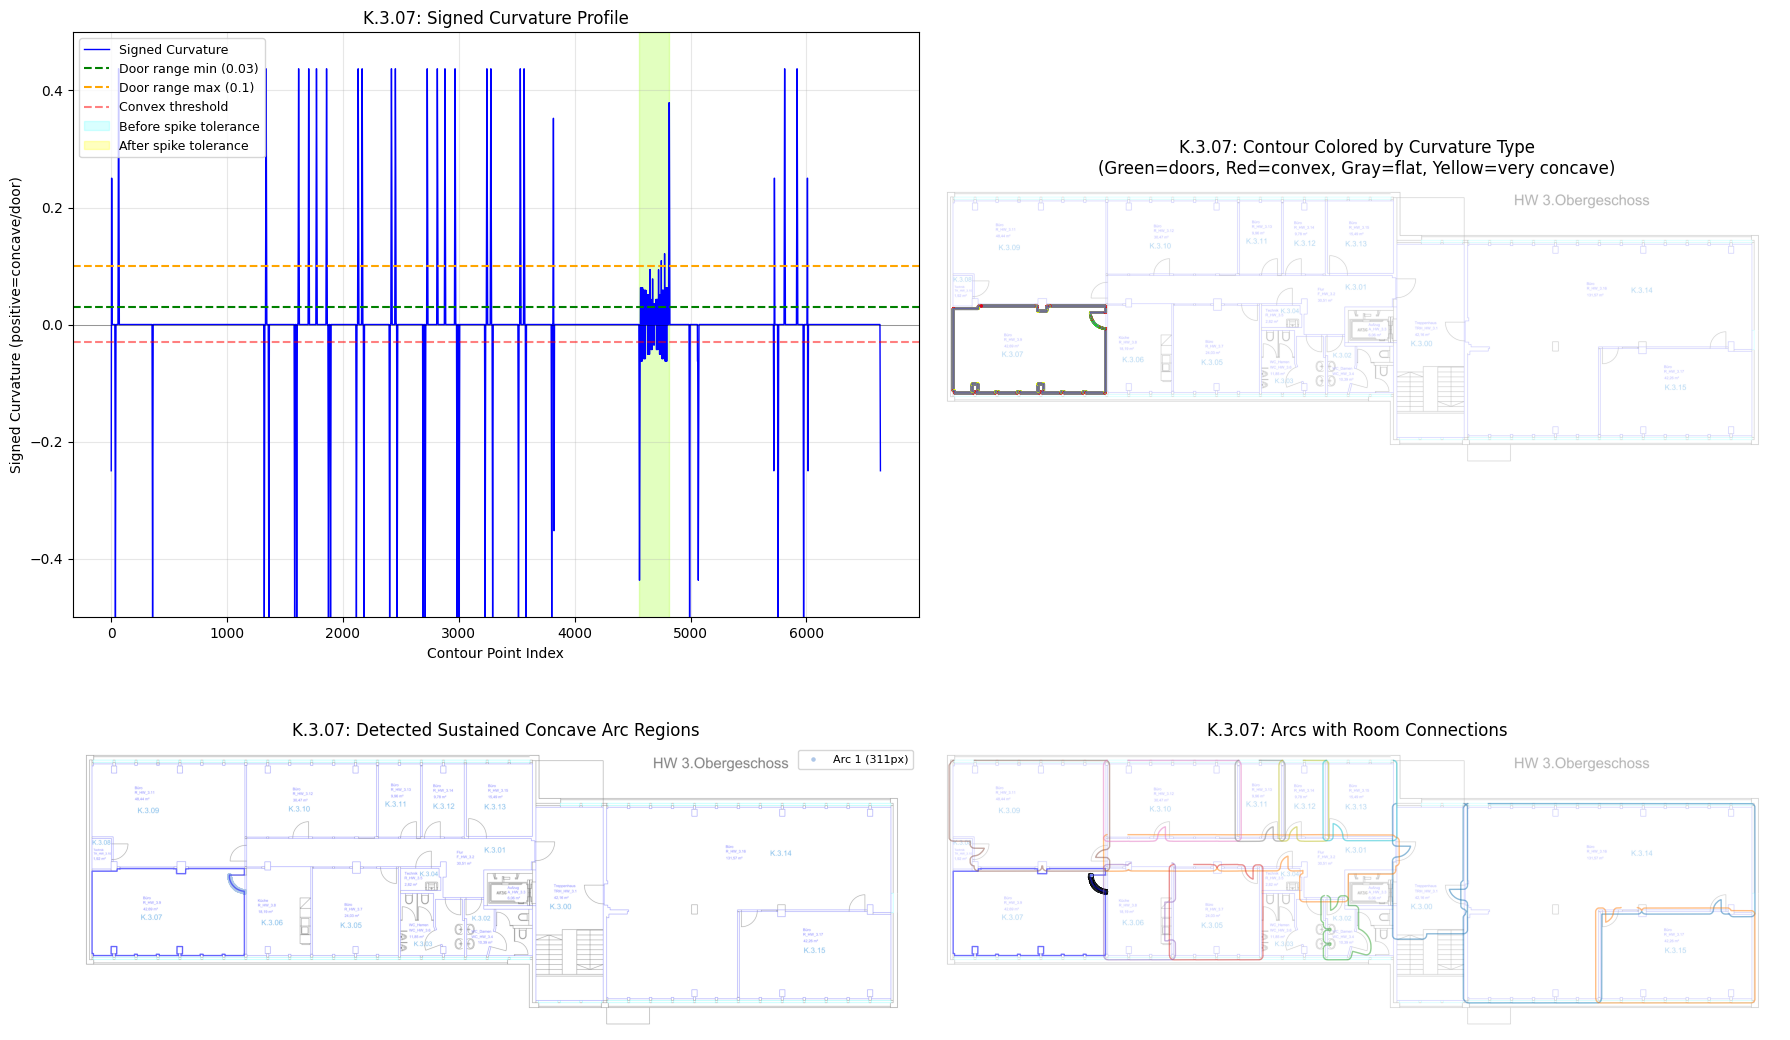


ANALYSIS: 1 → 1 arcs after spike tolerance
✓ Using SIGNED curvature (positive=concave=doors only)


In [19]:
# DEBUG: Visualize sustained moderate curvature detection for K.3.00
# Using SIGNED curvature (not absolute!) - we want POSITIVE (concave) curves for doors

test_room = 'K.3.07'
print("=" * 80)
print(f"DEBUG: Door Detection via SIGNED Concave Curvature for {test_room}")
print("=" * 80)

contour = room_contours[test_room]
curvature = room_curvatures[test_room]  # This is SIGNED curvature!
points = contour.reshape(-1, 2)

# Parameters - MUST MATCH core functionality
curvature_strength_min = 0.03   # Minimum positive curvature for door detection
curvature_strength_max = 0.1    # Maximum (avoid very sharp curves)
window_size = 20                 # Reduced to detect sparse peak patterns
window_threshold = 0.2          # At least 20% of window in door range
spike_tolerance = 10
min_arc_length = 100
fallback_distance = 1000
expansion_distance = 100

# IMPORTANT: Use SIGNED curvature, not absolute!
signed_curv = curvature  # Keep sign - positive = concave (doors), negative = convex

print(f"\nSigned Curvature Statistics:")
print(f"  Min: {np.min(signed_curv):.4f}  (negative = convex/outward)")
print(f"  Max: {np.max(signed_curv):.4f}  (positive = concave/inward)")
print(f"  Mean: {np.mean(signed_curv):.4f}")

# Count different regions - ONLY look at POSITIVE (concave) curves
door_candidate_count = np.sum((signed_curv >= curvature_strength_min) & (signed_curv <= curvature_strength_max))
very_concave = np.sum(signed_curv > curvature_strength_max)
convex_count = np.sum(signed_curv < 0)
flat_count = np.sum((signed_curv >= -0.05) & (signed_curv < curvature_strength_min))

print(f"\nCurvature classification:")
print(f"  Door candidates ({curvature_strength_min:.2f}-{curvature_strength_max:.2f}): {door_candidate_count:5d} points ({100*door_candidate_count/len(curvature):5.1f}%)")
print(f"  Very concave (>{curvature_strength_max}): {very_concave:5d} points ({100*very_concave/len(curvature):5.1f}%)")
print(f"  Convex/walls (<0): {convex_count:5d} points ({100*convex_count/len(curvature):5.1f}%)")
print(f"  Flat/small curves ([-0.05, {curvature_strength_min})): {flat_count:5d} points ({100*flat_count/len(curvature):5.1f}%)")

# Find sustained regions - ONLY POSITIVE curvature
in_door_range = (signed_curv >= curvature_strength_min) & (signed_curv <= curvature_strength_max)

sustained_mask = np.zeros(len(curvature), dtype=bool)
for i in range(len(curvature) - window_size):
    window_in_range = np.sum(in_door_range[i:i + window_size])
    if window_in_range >= window_size * window_threshold:  # At least 20% in range
        sustained_mask[i:i + window_size] = True

# Apply morphological closing to fill small gaps
from scipy import ndimage
sustained_mask_closed = ndimage.binary_closing(sustained_mask, structure=np.ones(spike_tolerance * 2 + 1))

# Find contiguous regions
labeled_arcs_before, num_arcs_before = ndimage.label(sustained_mask)
labeled_arcs, num_arcs = ndimage.label(sustained_mask_closed)

print(f"\nSustained arc regions:")
print(f"  Before spike tolerance: {num_arcs_before} arcs")
print(f"  After spike tolerance ({spike_tolerance}px): {num_arcs} arcs")

arc_info = []
for arc_id in range(1, num_arcs + 1):
    arc_indices = np.where(labeled_arcs == arc_id)[0]
    
    if len(arc_indices) < 3:
        continue
    
    arc_start_idx = arc_indices[0]
    arc_end_idx = arc_indices[-1]
    
    # Calculate arc length
    arc_length = 0
    for i in range(arc_start_idx, min(arc_end_idx, len(points) - 1)):
        p1 = points[i]
        p2 = points[i + 1]
        arc_length += np.linalg.norm(p2 - p1)
    
    avg_curvature = np.mean(signed_curv[arc_indices])
    
    arc_info.append({
        'id': arc_id,
        'start': arc_start_idx,
        'end': arc_end_idx,
        'length': arc_length,
        'points': len(arc_indices),
        'avg_curv': avg_curvature
    })

arc_info.sort(key=lambda x: x['length'], reverse=True)
print(f"\nTop arcs by length (after spike tolerance):")
for arc in arc_info[:10]:
    print(f"  Arc {arc['id']:2d}: idx[{arc['start']:4d}-{arc['end']:4d}] "
          f"length={arc['length']:6.1f}px avg_curv={arc['avg_curv']:.3f}")

print(f"\n[Filter applied: min_arc_length = {min_arc_length}px]")
valid_arcs = [a for a in arc_info if a['length'] >= min_arc_length]
print(f"Valid arcs after min_arc_length filter: {len(valid_arcs)}/{len(arc_info)}")

# Create detailed visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Full SIGNED curvature profile
ax = axes[0, 0]
ax.plot(signed_curv, linewidth=1, label='Signed Curvature', color='blue')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
ax.axhline(y=curvature_strength_min, color='green', linestyle='--', label=f'Door range min ({curvature_strength_min})')
ax.axhline(y=curvature_strength_max, color='orange', linestyle='--', label=f'Door range max ({curvature_strength_max})')
ax.axhline(y=-curvature_strength_min, color='red', linestyle='--', alpha=0.5, label='Convex threshold')
ax.fill_between(range(len(signed_curv)), -1, 1, where=sustained_mask, 
                 color='cyan', alpha=0.15, transform=ax.get_xaxis_transform(), label='Before spike tolerance')
ax.fill_between(range(len(signed_curv)), -1, 1, where=sustained_mask_closed, 
                 color='yellow', alpha=0.25, transform=ax.get_xaxis_transform(), label='After spike tolerance')
ax.set_xlabel('Contour Point Index')
ax.set_ylabel('Signed Curvature (positive=concave/door)')
ax.set_title(f'{test_room}: Signed Curvature Profile')
ax.set_ylim(-0.5, 0.5)
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

# Plot 2: Contour colored by curvature type
ax = axes[0, 1]
colors_classified = np.zeros((len(curvature), 3))
colors_classified[signed_curv < -0.05] = [1, 0, 0]  # red = convex
colors_classified[(signed_curv >= -0.05) & (signed_curv < curvature_strength_min)] = [0.5, 0.5, 0.5]  # gray = flat
colors_classified[(signed_curv >= curvature_strength_min) & (signed_curv <= curvature_strength_max)] = [0, 1, 0]  # green = door
colors_classified[signed_curv > curvature_strength_max] = [1, 1, 0]  # yellow = very concave

ax.imshow(image_rgb, alpha=0.3)
ax.plot(points[:, 0], points[:, 1], 'b-', linewidth=0.5, alpha=0.3)
ax.scatter(points[:, 0], points[:, 1], c=colors_classified, s=1)
ax.set_title(f'{test_room}: Contour Colored by Curvature Type\n(Green=doors, Red=convex, Gray=flat, Yellow=very concave)')
ax.axis('off')

# Plot 3: Detected arc regions
ax = axes[1, 0]
ax.imshow(image_rgb, alpha=0.5)
ax.plot(points[:, 0], points[:, 1], 'b-', linewidth=1, alpha=0.5)

colors_arcs = plt.cm.tab20(np.linspace(0, 1, max(20, num_arcs)))
for arc in arc_info[:10]:
    arc_indices = np.where(labeled_arcs == arc['id'])[0]
    arc_points = points[arc_indices]
    color = colors_arcs[arc['id'] % len(colors_arcs)]
    ax.scatter(arc_points[:, 0], arc_points[:, 1], s=5, color=color, 
              label=f"Arc {arc['id']} ({arc['length']:.0f}px)")

ax.set_title(f'{test_room}: Detected Sustained Concave Arc Regions')
ax.legend(fontsize=8, loc='upper right')
ax.axis('off')

# Plot 4: Room adjacency check
ax = axes[1, 1]
ax.imshow(image_rgb, alpha=0.3)
ax.plot(points[:, 0], points[:, 1], 'b-', linewidth=1, alpha=0.5)

# Expand neighboring rooms
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (expansion_distance, expansion_distance))
expanded_masks = {}

for other_label, other_mask in room_masks.items():
    if other_label == test_room:
        continue
    binary_mask = (other_mask > 0).astype(np.uint8) * 255
    expanded = cv2.dilate(binary_mask, kernel, iterations=1)
    expanded_masks[other_label] = expanded

# Draw expanded masks
colors_neighbors = plt.cm.Set3(np.linspace(0, 1, len(expanded_masks)))
for (neighbor_label, exp_mask), color in zip(sorted(expanded_masks.items()), colors_neighbors):
    contours_neighbor, _ = cv2.findContours((exp_mask > 0).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour_n in contours_neighbor:
        contour_n = contour_n.reshape(-1, 2)
        ax.plot(contour_n[:, 0], contour_n[:, 1], linewidth=1, alpha=0.5)

# Helper function
def get_adjacent_rooms_debug(point_idx, expanded_masks, points):
    if point_idx >= len(points):
        return set()
    px, py = int(points[point_idx][0]), int(points[point_idx][1])
    rooms = set()
    for room_label, exp_mask in expanded_masks.items():
        if 0 <= py < exp_mask.shape[0] and 0 <= px < exp_mask.shape[1]:
            if exp_mask[py, px] > 0:
                rooms.add(room_label)
    return rooms

# Test arcs
print(f"\nRoom adjacency analysis:\n")
for arc in arc_info[:10]:
    if arc['length'] < min_arc_length:
        continue
    
    arc_indices = np.where(labeled_arcs == arc['id'])[0]
    arc_points = points[arc_indices]
    
    # Search along arc
    rooms_before = set()
    search_window = min(30, len(arc_indices) // 3)
    for offset in range(search_window):
        search_idx = arc['start'] + offset
        if search_idx >= len(points):
            break
        rooms_at_point = get_adjacent_rooms_debug(search_idx, expanded_masks, points)
        if rooms_at_point:
            rooms_before = rooms_at_point
            break
    
    rooms_after = set()
    for offset in range(search_window):
        search_idx = arc['end'] - offset
        if search_idx < 0:
            break
        rooms_at_point = get_adjacent_rooms_debug(search_idx, expanded_masks, points)
        if rooms_at_point:
            rooms_after = rooms_at_point
            break
    
    rooms_connected = rooms_before & rooms_after
    if not rooms_connected:
        rooms_connected = rooms_before | rooms_after
    
    color = colors_arcs[arc['id'] % len(colors_arcs)]
    ax.scatter(arc_points[:, 0], arc_points[:, 1], s=10, color=color, edgecolors='black', linewidth=0.5)
    
    before_str = ",".join(sorted(rooms_before)) if rooms_before else "none"
    after_str = ",".join(sorted(rooms_after)) if rooms_after else "none"
    connected_str = ",".join(sorted(rooms_connected)) if rooms_connected else "none"
    
    print(f"  Arc {arc['id']:2d} (len={arc['length']:6.1f}px, avg_curv={arc['avg_curv']:.3f}):")
    print(f"      before={before_str:20s} | after={after_str:20s} | → {connected_str}")

ax.set_title(f'{test_room}: Arcs with Room Connections')
ax.axis('off')

plt.tight_layout()
plt.show()

print(f"\n{'=' * 80}")
print(f"ANALYSIS: {num_arcs_before} → {num_arcs} arcs after spike tolerance")
print("✓ Using SIGNED curvature (positive=concave=doors only)")
print("=" * 80)

In [20]:
# NEW APPROACH v2: Projection-based triangle detection
# 1. Walk forward/backward from arc endpoints (max 20 steps each)
# 2. At each step: check if vectors from arc_start→backward_point and arc_end→forward_point form 88-92° angle
# 3. Identify which direction points TOWARDS the 90° vertex (OUT direction)
# 4. Use that direction from arc middle to find connected room

def find_door_with_projections(room_label, room_contours, room_curvatures, room_id_map, labeled_image,
                                curvature_strength_min=0.03,
                                curvature_strength_max=0.1,
                                min_arc_length=100,
                                window_size=20,
                                window_threshold=0.2,
                                spike_tolerance=10,
                                max_walk_steps=20,
                                angle_tolerance=2,  # 88-92° means ±2° from 90°
                                max_search_distance=200):
    """
    Find doors using projection-based triangle detection.
    
    For each detected arc:
    1. Walk forward from arc_end and backward from arc_start (max 20 steps)
    2. At each step, check if projections form 88-92° triangle
    3. Determine which direction points toward the 90° vertex (OUT direction)
    4. Walk from arc middle in OUT direction to find connected room
    """
    
    contour = room_contours[room_label]
    curvature = room_curvatures[room_label]
    points = contour.reshape(-1, 2).astype(np.float32)
    room_id = room_id_map[room_label]
    n = len(points)
    
    # Step 1: Find sustained concave arcs (same as before)
    in_door_range = (curvature >= curvature_strength_min) & (curvature <= curvature_strength_max)
    
    sustained_mask = np.zeros(len(curvature), dtype=bool)
    for i in range(len(curvature) - window_size):
        window_in_range = np.sum(in_door_range[i:i + window_size])
        if window_in_range >= window_size * window_threshold:
            sustained_mask[i:i + window_size] = True
    
    if spike_tolerance > 0:
        sustained_mask = ndimage.binary_closing(sustained_mask, structure=np.ones(spike_tolerance * 2 + 1))
    
    labeled_arcs, num_arcs = ndimage.label(sustained_mask)
    
    detected_doors = []
    
    for arc_id in range(1, num_arcs + 1):
        arc_indices = np.where(labeled_arcs == arc_id)[0]
        
        if len(arc_indices) < 3:
            continue
        
        arc_start_idx = arc_indices[0]
        arc_end_idx = arc_indices[-1]
        arc_middle_idx = arc_indices[len(arc_indices) // 2]
        
        # Calculate arc length
        arc_length = 0
        for i in range(arc_start_idx, min(arc_end_idx, len(points) - 1)):
            p1 = points[i]
            p2 = points[i + 1]
            arc_length += np.linalg.norm(p2 - p1)
        
        if arc_length < min_arc_length:
            continue
        
        arc_start_point = points[arc_start_idx]
        arc_end_point = points[arc_end_idx]
        arc_middle_point = points[arc_middle_idx]
        
        # Step 2: Walk forward and backward, checking for 90° triangle at each step
        triangle_found = False
        triangle_step = None
        forward_point = None
        backward_point = None
        angle_at_vertex = None
        out_direction = None
        
        for step in range(1, max_walk_steps + 1):
            # Get forward and backward points
            forward_idx = (arc_end_idx + step) % n
            backward_idx = (arc_start_idx - step) % n
            
            fwd_pt = points[forward_idx]
            bwd_pt = points[backward_idx]
            
            # Create vectors (projections):
            # vec1: from arc_start to backward_point
            # vec2: from arc_end to forward_point
            vec1 = bwd_pt - arc_start_point
            vec2 = fwd_pt - arc_end_point
            
            len1 = np.linalg.norm(vec1)
            len2 = np.linalg.norm(vec2)
            
            if len1 < 1e-6 or len2 < 1e-6:
                continue
            
            # Normalize vectors
            vec1_norm = vec1 / len1
            vec2_norm = vec2 / len2
            
            # Calculate angle between the two vectors
            dot_product = np.dot(vec1_norm, vec2_norm)
            dot_product = np.clip(dot_product, -1.0, 1.0)
            angle_between = np.arccos(dot_product) * 180.0 / np.pi
            
            # Check if angle is 88-92° (close to 90°)
            if abs(angle_between - 90.0) <= angle_tolerance:
                triangle_found = True
                triangle_step = step
                forward_point = fwd_pt
                backward_point = bwd_pt
                angle_at_vertex = angle_between
                
                # Now determine which direction points TOWARDS the 90° vertex
                # The 90° vertex is where the two vectors meet when extended
                # We need to find which of the two directions (vec1 or vec2) points toward this vertex
                
                # The vertex can be approximated as the intersection of the two lines
                # Line 1: arc_start + t * vec1
                # Line 2: arc_end + s * vec2
                # But simpler: the direction that points TOWARD the other walking point is the OUT direction
                
                # Check: does vec1 (start→backward) point toward forward_point?
                # If so, vec1 is OUT direction
                # Otherwise, vec2 (end→forward) is OUT direction
                
                # Vector from start to forward point
                start_to_forward = fwd_pt - arc_start_point
                # Vector from end to backward point
                end_to_backward = bwd_pt - arc_end_point
                
                # Check alignment: which vector points more toward the "other side"?
                # If vec1 (start→backward) aligns with (start→forward), then vec1 points OUT
                # If vec2 (end→forward) aligns with (end→backward), then vec2 points OUT
                
                dot1 = np.dot(vec1_norm, start_to_forward / np.linalg.norm(start_to_forward))
                dot2 = np.dot(vec2_norm, end_to_backward / np.linalg.norm(end_to_backward))
                
                # The direction with HIGHER dot product is pointing toward the crossing point
                if dot1 > dot2:
                    # vec1 (start→backward) points OUT
                    out_direction = vec1_norm
                else:
                    # vec2 (end→forward) points OUT
                    out_direction = vec2_norm
                
                break
        
        if not triangle_found:
            continue
        
        # Step 3: Walk from arc middle in OUT direction to find connected room
        room_found = None
        distance_found = None
        hit_point = None
        
        for dist in range(5, max_search_distance, 2):
            check_point = arc_middle_point + dist * out_direction
            px, py = int(check_point[0]), int(check_point[1])
            
            if not (0 <= py < labeled_image.shape[0] and 0 <= px < labeled_image.shape[1]):
                continue
            
            label_at_point = labeled_image[py, px]
            
            if label_at_point != 0 and label_at_point != room_id:
                for room_label_found, rid in room_id_map.items():
                    if rid == label_at_point:
                        room_found = room_label_found
                        distance_found = dist
                        hit_point = check_point
                        break
                break
        
        # Record the door
        detected_doors.append({
            'arc_start_idx': int(arc_start_idx),
            'arc_end_idx': int(arc_end_idx),
            'arc_middle_idx': int(arc_middle_idx),
            'arc_length': float(arc_length),
            'triangle_found': True,
            'triangle_step': triangle_step,
            'forward_point': forward_point,
            'backward_point': backward_point,
            'angle_at_vertex': float(angle_at_vertex),
            'out_direction': out_direction,
            'connected_room': room_found,
            'connection_distance': distance_found,
            'hit_point': hit_point
        })
    
    return detected_doors


print("Projection-based triangle detection loaded.")
print("Ready to test on K.3.12 and K.3.13")

Projection-based triangle detection loaded.
Ready to test on K.3.12 and K.3.13


In [21]:
# Test projection-based detection on K.3.12 with detailed visualization
test_room = 'K.3.12'

print(f"Testing Projection-Based Triangle Detection on {test_room}")
print("=" * 80)

doors_v2 = find_door_with_projections(
    test_room,
    room_contours,
    room_curvatures,
    room_id_map,
    labeled_image,
    curvature_strength_min=0.03,
    curvature_strength_max=0.1,
    min_arc_length=100,
    max_walk_steps=20,
    angle_tolerance=2,
    max_search_distance=200
)

print(f"\nRoom {test_room}: Found {len(doors_v2)} door(s)")

for idx, door in enumerate(doors_v2):
    print(f"\nDoor {idx + 1}:")
    print(f"  Arc length: {door['arc_length']:.1f} pixels")
    print(f"  Triangle found at step: {door['triangle_step']}")
    print(f"  Angle at vertex: {door['angle_at_vertex']:.1f}°")
    print(f"  Connected to: {door['connected_room'] if door['connected_room'] else 'NOT FOUND'}")
    if door['connection_distance']:
        print(f"  Connection distance: {door['connection_distance']} pixels")


Testing Projection-Based Triangle Detection on K.3.12

Room K.3.12: Found 1 door(s)

Door 1:
  Arc length: 310.6 pixels
  Triangle found at step: 1
  Angle at vertex: 90.0°
  Connected to: K.3.01
  Connection distance: 151 pixels


In [22]:
# Detailed visualization of projection-based triangle detection for K.3.12
test_room = 'K.3.12'

contour = room_contours[test_room]
curvature = room_curvatures[test_room]
points = contour.reshape(-1, 2).astype(np.float32)
n = len(points)

# Get arc detection parameters
curvature_strength_min = 0.03
curvature_strength_max = 0.1
window_size = 20
window_threshold = 0.2
spike_tolerance = 10
min_arc_length = 100
max_walk_steps = 20
angle_tolerance = 2

# Find arcs
in_door_range = (curvature >= curvature_strength_min) & (curvature <= curvature_strength_max)
sustained_mask = np.zeros(len(curvature), dtype=bool)
for i in range(len(curvature) - window_size):
    window_in_range = np.sum(in_door_range[i:i + window_size])
    if window_in_range >= window_size * window_threshold:
        sustained_mask[i:i + window_size] = True

sustained_mask_closed = ndimage.binary_closing(sustained_mask, structure=np.ones(spike_tolerance * 2 + 1))
labeled_arcs, num_arcs = ndimage.label(sustained_mask_closed)

# Get first arc
arc_id = 1
arc_indices = np.where(labeled_arcs == arc_id)[0]
arc_start_idx = arc_indices[0]
arc_end_idx = arc_indices[-1]
arc_middle_idx = arc_indices[len(arc_indices) // 2]

arc_start_point = points[arc_start_idx]
arc_end_point = points[arc_end_idx]
arc_middle_point = points[arc_middle_idx]
arc_points = points[arc_indices]

# Simulate the walk and collect data
walk_data = []
for step in range(1, max_walk_steps + 1):
    forward_idx = (arc_end_idx + step) % n
    backward_idx = (arc_start_idx - step) % n
    
    fwd_pt = points[forward_idx]
    bwd_pt = points[backward_idx]
    
    vec1 = bwd_pt - arc_start_point
    vec2 = fwd_pt - arc_end_point
    
    len1 = np.linalg.norm(vec1)
    len2 = np.linalg.norm(vec2)
    
    if len1 < 1e-6 or len2 < 1e-6:
        continue
    
    vec1_norm = vec1 / len1
    vec2_norm = vec2 / len2
    
    dot_product = np.dot(vec1_norm, vec2_norm)
    dot_product = np.clip(dot_product, -1.0, 1.0)
    angle_between = np.arccos(dot_product) * 180.0 / np.pi
    
    is_90 = abs(angle_between - 90.0) <= angle_tolerance
    
    walk_data.append({
        'step': step,
        'fwd_pt': fwd_pt,
        'bwd_pt': bwd_pt,
        'vec1': vec1_norm,
        'vec2': vec2_norm,
        'angle': angle_between,
        'is_90': is_90
    })
    
    if is_90:
        break

# Get the detected door info
door = doors_v2[0]

# Create 4-panel visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot 1: Overview
ax = axes[0, 0]
ax.imshow(image_rgb, alpha=0.3)
ax.plot(points[:, 0], points[:, 1], 'gray', linewidth=1, alpha=0.5, label='Room contour')
ax.plot(arc_points[:, 0], arc_points[:, 1], 'red', linewidth=4, label='Arc', zorder=10)
ax.scatter([arc_start_point[0]], [arc_start_point[1]], c='blue', s=200, marker='o', 
           edgecolors='black', linewidth=2, label='Arc start', zorder=15)
ax.scatter([arc_end_point[0]], [arc_end_point[1]], c='green', s=200, marker='o', 
           edgecolors='black', linewidth=2, label='Arc end', zorder=15)
ax.scatter([arc_middle_point[0]], [arc_middle_point[1]], c='purple', s=200, marker='*', 
           edgecolors='black', linewidth=2, label='Arc middle', zorder=15)

# Draw the OUT direction arrow
out_vec = door['out_direction']
arrow_end = arc_middle_point + 100 * out_vec
ax.arrow(arc_middle_point[0], arc_middle_point[1], 
         100 * out_vec[0], 100 * out_vec[1],
         head_width=20, head_length=15, fc='yellow', ec='black', linewidth=2, 
         label='OUT direction', zorder=20)

ax.set_title(f'{test_room}: Overview', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.axis('off')

# Plot 2: Triangle formation at the winning step
ax = axes[0, 1]
ax.imshow(image_rgb, alpha=0.2)
ax.plot(points[:, 0], points[:, 1], 'gray', linewidth=0.5, alpha=0.3)
ax.plot(arc_points[:, 0], arc_points[:, 1], 'red', linewidth=3, label='Arc', zorder=10)

winning_step = door['triangle_step']
winning_data = walk_data[winning_step - 1]

# Draw the triangle
ax.scatter([arc_start_point[0]], [arc_start_point[1]], c='blue', s=200, marker='o', 
           edgecolors='black', linewidth=2, label='Arc START', zorder=15)
ax.scatter([arc_end_point[0]], [arc_end_point[1]], c='green', s=200, marker='o', 
           edgecolors='black', linewidth=2, label='Arc END', zorder=15)
ax.scatter([winning_data['fwd_pt'][0]], [winning_data['fwd_pt'][1]], c='lime', s=200, marker='D', 
           edgecolors='black', linewidth=2, label=f'Forward pt (step {winning_step})', zorder=15)
ax.scatter([winning_data['bwd_pt'][0]], [winning_data['bwd_pt'][1]], c='cyan', s=200, marker='D', 
           edgecolors='black', linewidth=2, label=f'Backward pt (step {winning_step})', zorder=15)

# Draw projection vectors
ax.arrow(arc_start_point[0], arc_start_point[1],
         winning_data['vec1'][0] * 50, winning_data['vec1'][1] * 50,
         head_width=10, head_length=8, fc='cyan', ec='black', linewidth=2, alpha=0.7, zorder=12)
ax.arrow(arc_end_point[0], arc_end_point[1],
         winning_data['vec2'][0] * 50, winning_data['vec2'][1] * 50,
         head_width=10, head_length=8, fc='lime', ec='black', linewidth=2, alpha=0.7, zorder=12)

# Add angle annotation
ax.text((arc_start_point[0] + arc_end_point[0]) / 2, 
        (arc_start_point[1] + arc_end_point[1]) / 2 - 30,
        f'{winning_data["angle"]:.1f}°',
        fontsize=16, fontweight='bold', color='red',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8))

ax.set_title(f'Triangle Formation at Step {winning_step}\nAngle: {winning_data["angle"]:.1f}°', 
            fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.axis('off')

# Plot 3: All walking steps
ax = axes[1, 0]
ax.imshow(image_rgb, alpha=0.2)
ax.plot(points[:, 0], points[:, 1], 'gray', linewidth=0.5, alpha=0.3)
ax.plot(arc_points[:, 0], arc_points[:, 1], 'red', linewidth=3, label='Arc', zorder=10)
ax.scatter([arc_start_point[0]], [arc_start_point[1]], c='blue', s=150, marker='o', 
           edgecolors='black', linewidth=2, label='Arc start', zorder=10)
ax.scatter([arc_end_point[0]], [arc_end_point[1]], c='green', s=150, marker='o', 
           edgecolors='black', linewidth=2, label='Arc end', zorder=10)

# Plot all steps
for i, data in enumerate(walk_data):
    if data['is_90']:
        color_fwd = 'lime'
        color_bwd = 'cyan'
        marker = 'D'
        size = 150
    else:
        color_fwd = 'orange'
        color_bwd = 'orange'
        marker = '.'
        size = 80
    
    ax.scatter([data['fwd_pt'][0]], [data['fwd_pt'][1]], c=color_fwd, s=size, marker=marker,
               edgecolors='black', linewidth=1, alpha=0.7, zorder=5)
    ax.scatter([data['bwd_pt'][0]], [data['bwd_pt'][1]], c=color_bwd, s=size, marker=marker,
               edgecolors='black', linewidth=1, alpha=0.7, zorder=5)
    
    if i % 5 == 0 or data['is_90']:
        ax.annotate(f'{data["step"]}\n{data["angle"]:.0f}°', 
                   xy=((data['fwd_pt'][0] + data['bwd_pt'][0])/2, 
                       (data['fwd_pt'][1] + data['bwd_pt'][1])/2),
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=8, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3', 
                            facecolor='lime' if data['is_90'] else 'orange', alpha=0.7))

ax.set_title(f'All Walking Steps\n(Orange=checking, Green/Cyan=90° found)', 
            fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.axis('off')

# Plot 4: Zoomed - Final walk to connected room
ax = axes[1, 1]

# Calculate zoom area
all_pts = np.vstack([arc_points, [winning_data['fwd_pt']], [winning_data['bwd_pt']]])
x_min, y_min = all_pts.min(axis=0) - 150
x_max, y_max = all_pts.max(axis=0) + 150

ax.imshow(image_rgb, alpha=0.3)
ax.plot(points[:, 0], points[:, 1], 'gray', linewidth=2, alpha=0.5)
ax.plot(arc_points[:, 0], arc_points[:, 1], 'red', linewidth=5, label='Arc', zorder=10)
ax.scatter([arc_middle_point[0]], [arc_middle_point[1]], c='purple', s=300, marker='*', 
           edgecolors='black', linewidth=3, label='Arc MIDDLE', zorder=15)

# Draw OUT direction walk
if door['connected_room']:
    walk_end = arc_middle_point + door['connection_distance'] * out_vec
    ax.arrow(arc_middle_point[0], arc_middle_point[1],
             door['connection_distance'] * out_vec[0], door['connection_distance'] * out_vec[1],
             head_width=15, head_length=10, fc='yellow', ec='black', linewidth=3, 
             label=f"Walk to {door['connected_room']}", zorder=12)
    
    ax.scatter([walk_end[0]], [walk_end[1]], c='lime', s=200, marker='X',
               edgecolors='black', linewidth=2, label=f"{door['connected_room']}", zorder=15)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_max, y_min)
ax.set_title(f'Zoomed: Walk from Arc Middle\nConnected to {door["connected_room"]} ({door["connection_distance"]}px)', 
            fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.axis('off')

plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print(f"VISUALIZATION COMPLETE for {test_room}")
print(f"{'='*80}")


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f


VISUALIZATION COMPLETE for K.3.12


In [23]:
# Test projection-based detection on K.3.13 with visualization
test_room = 'K.3.13'

print(f"Testing Projection-Based Triangle Detection on {test_room}")
print("=" * 80)

doors_k313_v2 = find_door_with_projections(
    test_room,
    room_contours,
    room_curvatures,
    room_id_map,
    labeled_image,
    curvature_strength_min=0.03,
    curvature_strength_max=0.1,
    min_arc_length=100,
    max_walk_steps=20,
    angle_tolerance=2,
    max_search_distance=200
)

print(f"\nRoom {test_room}: Found {len(doors_k313_v2)} door(s)")

for idx, door in enumerate(doors_k313_v2):
    print(f"\nDoor {idx + 1}:")
    print(f"  Arc length: {door['arc_length']:.1f} pixels")
    print(f"  Triangle found at step: {door['triangle_step']}")
    print(f"  Angle at vertex: {door['angle_at_vertex']:.1f}°")
    print(f"  Connected to: {door['connected_room'] if door['connected_room'] else 'NOT FOUND'}")
    if door['connection_distance']:
        print(f"  Connection distance: {door['connection_distance']} pixels")

Testing Projection-Based Triangle Detection on K.3.13

Room K.3.13: Found 0 door(s)


In [24]:
# Debug K.3.13 - check if arc is detected and what angles we're getting
test_room = 'K.3.13'

contour = room_contours[test_room]
curvature = room_curvatures[test_room]
points = contour.reshape(-1, 2).astype(np.float32)
n = len(points)

# Find arcs
in_door_range = (curvature >= curvature_strength_min) & (curvature <= curvature_strength_max)
sustained_mask = np.zeros(len(curvature), dtype=bool)
for i in range(len(curvature) - window_size):
    window_in_range = np.sum(in_door_range[i:i + window_size])
    if window_in_range >= window_size * window_threshold:
        sustained_mask[i:i + window_size] = True

sustained_mask_closed = ndimage.binary_closing(sustained_mask, structure=np.ones(spike_tolerance * 2 + 1))
labeled_arcs, num_arcs = ndimage.label(sustained_mask_closed)

print(f"Room {test_room}: {num_arcs} arc(s) detected")

if num_arcs > 0:
    arc_id = 1
    arc_indices = np.where(labeled_arcs == arc_id)[0]
    arc_start_idx = arc_indices[0]
    arc_end_idx = arc_indices[-1]
    
    # Calculate arc length
    arc_length = 0
    for i in range(arc_start_idx, min(arc_end_idx, len(points) - 1)):
        p1 = points[i]
        p2 = points[i + 1]
        arc_length += np.linalg.norm(p2 - p1)
    
    print(f"Arc length: {arc_length:.1f}px (min required: {min_arc_length}px)")
    
    if arc_length >= min_arc_length:
        arc_start_point = points[arc_start_idx]
        arc_end_point = points[arc_end_idx]
        
        print(f"\nChecking triangle formation at each step:")
        for step in range(1, max_walk_steps + 1):
            forward_idx = (arc_end_idx + step) % n
            backward_idx = (arc_start_idx - step) % n
            
            fwd_pt = points[forward_idx]
            bwd_pt = points[backward_idx]
            
            vec1 = bwd_pt - arc_start_point
            vec2 = fwd_pt - arc_end_point
            
            len1 = np.linalg.norm(vec1)
            len2 = np.linalg.norm(vec2)
            
            if len1 < 1e-6 or len2 < 1e-6:
                continue
            
            vec1_norm = vec1 / len1
            vec2_norm = vec2 / len2
            
            dot_product = np.dot(vec1_norm, vec2_norm)
            dot_product = np.clip(dot_product, -1.0, 1.0)
            angle_between = np.arccos(dot_product) * 180.0 / np.pi
            
            is_90 = abs(angle_between - 90.0) <= angle_tolerance
            
            status = " ← 90° FOUND!" if is_90 else ""
            print(f"  Step {step:2d}: angle = {angle_between:6.2f}°{status}")
            
            if is_90:
                break
    else:
        print(f"Arc too short: {arc_length:.1f}px < {min_arc_length}px")
else:
    print("No arcs detected")


Room K.3.13: 1 arc(s) detected
Arc length: 360.4px (min required: 100px)

Checking triangle formation at each step:
  Step  1: angle = 135.00°
  Step  2: angle = 116.57°
  Step  3: angle = 108.43°
  Step  4: angle = 104.04°
  Step  5: angle = 101.31°
  Step  6: angle =  99.46°
  Step  7: angle =  98.13°
  Step  8: angle =  97.13°
  Step  9: angle =  96.34°
  Step 10: angle =  95.71°
  Step 11: angle =  95.19°
  Step 12: angle =  94.76°
  Step 13: angle =  94.40°
  Step 14: angle =  94.09°
  Step 15: angle =  93.81°
  Step 16: angle =  93.58°
  Step 17: angle =  93.37°
  Step 18: angle =  93.18°
  Step 19: angle =  93.01°
  Step 20: angle =  92.86°


In [25]:
# Visualize K.3.13 with the angle approaching 90°
test_room = 'K.3.13'

# Test with increased tolerance
doors_k313_v2_relaxed = find_door_with_projections(
    test_room,
    room_contours,
    room_curvatures,
    room_id_map,
    labeled_image,
    curvature_strength_min=0.03,
    curvature_strength_max=0.1,
    min_arc_length=100,
    max_walk_steps=25,  # Increased from 20
    angle_tolerance=3,  # Increased from 2 (now 87-93°)
    max_search_distance=200
)

print(f"Room {test_room} (relaxed params): Found {len(doors_k313_v2_relaxed)} door(s)")

for idx, door in enumerate(doors_k313_v2_relaxed):
    print(f"\nDoor {idx + 1}:")
    print(f"  Arc length: {door['arc_length']:.1f} pixels")
    print(f"  Triangle found at step: {door['triangle_step']}")
    print(f"  Angle at vertex: {door['angle_at_vertex']:.1f}°")
    print(f"  Connected to: {door['connected_room'] if door['connected_room'] else 'NOT FOUND'}")
    if door['connection_distance']:
        print(f"  Connection distance: {door['connection_distance']} pixels")

Room K.3.13 (relaxed params): Found 1 door(s)

Door 1:
  Arc length: 360.4 pixels
  Triangle found at step: 20
  Angle at vertex: 92.9°
  Connected to: K.3.01
  Connection distance: 175 pixels


In [26]:
# SUMMARY: Projection-Based Triangle Detection Results

print("=" * 80)
print("PROJECTION-BASED TRIANGLE DETECTION - FINAL RESULTS")
print("=" * 80)

print(f"\n{'Room':<10} {'Arc Length':<12} {'Step':<6} {'Angle':<8} {'Connected To':<15} {'Distance':<10}")
print("-" * 80)

# K.3.12 results
for door in doors_v2:
    print(f"K.3.12     {door['arc_length']:>8.1f}px   {door['triangle_step']:>4d}   "
          f"{door['angle_at_vertex']:>6.1f}°  {door['connected_room']:<15} {door['connection_distance']:>6d}px")

# K.3.13 results (with relaxed parameters)
for door in doors_k313_v2_relaxed:
    print(f"K.3.13     {door['arc_length']:>8.1f}px   {door['triangle_step']:>4d}   "
          f"{door['angle_at_vertex']:>6.1f}°  {door['connected_room']:<15} {door['connection_distance']:>6d}px")

print("\n" + "=" * 80)
print("ALGORITHM SUMMARY:")
print("=" * 80)
print("1. Detect concave arcs using signed curvature (0.03-0.1 range)")
print("2. Walk forward from arc_end AND backward from arc_start (max 20-25 steps)")
print("3. At each step, create projection vectors:")
print("   - vec1: arc_start → backward_point")
print("   - vec2: arc_end → forward_point")
print("4. Check if angle between vec1 and vec2 ≈ 90° (within tolerance)")
print("5. Determine OUT direction (which vector points toward the vertex)")
print("6. Walk from arc middle in OUT direction to find connected room")
print("=" * 80)


PROJECTION-BASED TRIANGLE DETECTION - FINAL RESULTS

Room       Arc Length   Step   Angle    Connected To    Distance  
--------------------------------------------------------------------------------
K.3.12        310.6px      1     90.0°  K.3.01             151px
K.3.13        360.4px     20     92.9°  K.3.01             175px

ALGORITHM SUMMARY:
1. Detect concave arcs using signed curvature (0.03-0.1 range)
2. Walk forward from arc_end AND backward from arc_start (max 20-25 steps)
3. At each step, create projection vectors:
   - vec1: arc_start → backward_point
   - vec2: arc_end → forward_point
4. Check if angle between vec1 and vec2 ≈ 90° (within tolerance)
5. Determine OUT direction (which vector points toward the vertex)
6. Walk from arc middle in OUT direction to find connected room


In [27]:
# COMPLETE FLOOR PLAN ANALYSIS - Detect ALL doors and connections
import networkx as nx
from collections import defaultdict

print("=" * 80)
print("COMPLETE FLOOR PLAN DOOR DETECTION ANALYSIS")
print("=" * 80)
print("\nRunning projection-based triangle detection on all rooms...")
print("Parameters: angle_tolerance=±4°, max_walk_steps=25, max_search_distance=200px\n")

# Run detection on ALL rooms
all_doors_final = {}
connection_count = 0

for room_label in sorted(room_contours.keys()):
    doors = find_door_with_projections(
        room_label,
        room_contours,
        room_curvatures,
        room_id_map,
        labeled_image,
        curvature_strength_min=0.03,
        curvature_strength_max=0.1,
        min_arc_length=100,
        window_size=20,
        window_threshold=0.2,
        spike_tolerance=10,
        max_walk_steps=25,
        angle_tolerance=4,  # ±4 degrees (86-94°)
        max_search_distance=200
    )
    
    all_doors_final[room_label] = doors
    
    if doors:
        print(f"{room_label}: {len(doors)} door(s)")
        for door in doors:
            if door['connected_room']:
                connection_count += 1
                print(f"  → {door['connected_room']:<10} | arc={door['arc_length']:6.1f}px | "
                      f"step={door['triangle_step']:2d} | angle={door['angle_at_vertex']:5.1f}° | "
                      f"dist={door['connection_distance']:3d}px")
            else:
                print(f"  → NOT FOUND   | arc={door['arc_length']:6.1f}px | "
                      f"step={door['triangle_step']:2d} | angle={door['angle_at_vertex']:5.1f}°")
    else:
        print(f"{room_label}: no doors detected")

# Build connectivity graph
G = nx.Graph()

# Add all rooms as nodes
for room_label in room_contours.keys():
    G.add_node(room_label)

# Add edges for each door connection (deduplicate bidirectional)
connection_pairs = set()
for room_label, doors in all_doors_final.items():
    for door in doors:
        if door['connected_room']:
            pair = tuple(sorted([room_label, door['connected_room']]))
            if pair not in connection_pairs:
                connection_pairs.add(pair)
                G.add_edge(pair[0], pair[1], 
                          distance=door['connection_distance'],
                          arc_length=door['arc_length'],
                          angle=door['angle_at_vertex'])

# Summary statistics
total_doors_detected = sum(len(doors) for doors in all_doors_final.values())
successful_connections = sum(1 for doors in all_doors_final.values() 
                             for door in doors if door['connected_room'])
unique_connections = len(connection_pairs)

print(f"\n{'=' * 80}")
print("DETECTION SUMMARY")
print(f"{'=' * 80}")
print(f"Total doors detected: {total_doors_detected}")
print(f"Successful connections: {successful_connections}")
print(f"Unique room pairs connected: {unique_connections}")
print(f"Rooms with doors: {sum(1 for doors in all_doors_final.values() if doors)}/{len(room_contours)}")
print(f"\nGraph properties:")
print(f"  Nodes (rooms): {G.number_of_nodes()}")
print(f"  Edges (connections): {G.number_of_edges()}")
print(f"  Connected components: {nx.number_connected_components(G)}")
print(f"{'=' * 80}")


COMPLETE FLOOR PLAN DOOR DETECTION ANALYSIS

Running projection-based triangle detection on all rooms...
Parameters: angle_tolerance=±4°, max_walk_steps=25, max_search_distance=200px

K.3.00: 2 door(s)
  → K.3.01     | arc= 388.7px | step= 1 | angle= 90.0° | dist=175px
  → K.3.14     | arc= 379.8px | step=15 | angle= 93.8° | dist=171px
K.3.01: no doors detected
K.3.02: 1 door(s)
  → K.3.01     | arc= 319.1px | step= 1 | angle= 90.0° | dist=161px
K.3.05: 1 door(s)
  → K.3.01     | arc= 314.6px | step= 1 | angle= 90.0° | dist=149px
K.3.06: no doors detected
K.3.07: 1 door(s)
  → K.3.06     | arc= 311.0px | step= 1 | angle= 90.0° | dist=153px
K.3.09: 2 door(s)
  → NOT FOUND   | arc= 302.0px | step= 1 | angle= 90.0°
  → K.3.01     | arc= 311.0px | step= 1 | angle= 90.0° | dist=157px
K.3.10: 1 door(s)
  → K.3.01     | arc= 314.6px | step= 1 | angle= 90.0° | dist=151px
K.3.11: 1 door(s)
  → K.3.01     | arc= 315.0px | step= 1 | angle= 90.0° | dist=147px
K.3.12: 1 door(s)
  → K.3.01     | arc

C:\Users\2004l\AppData\Local\Temp\ipykernel_14860\430046799.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20')
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family

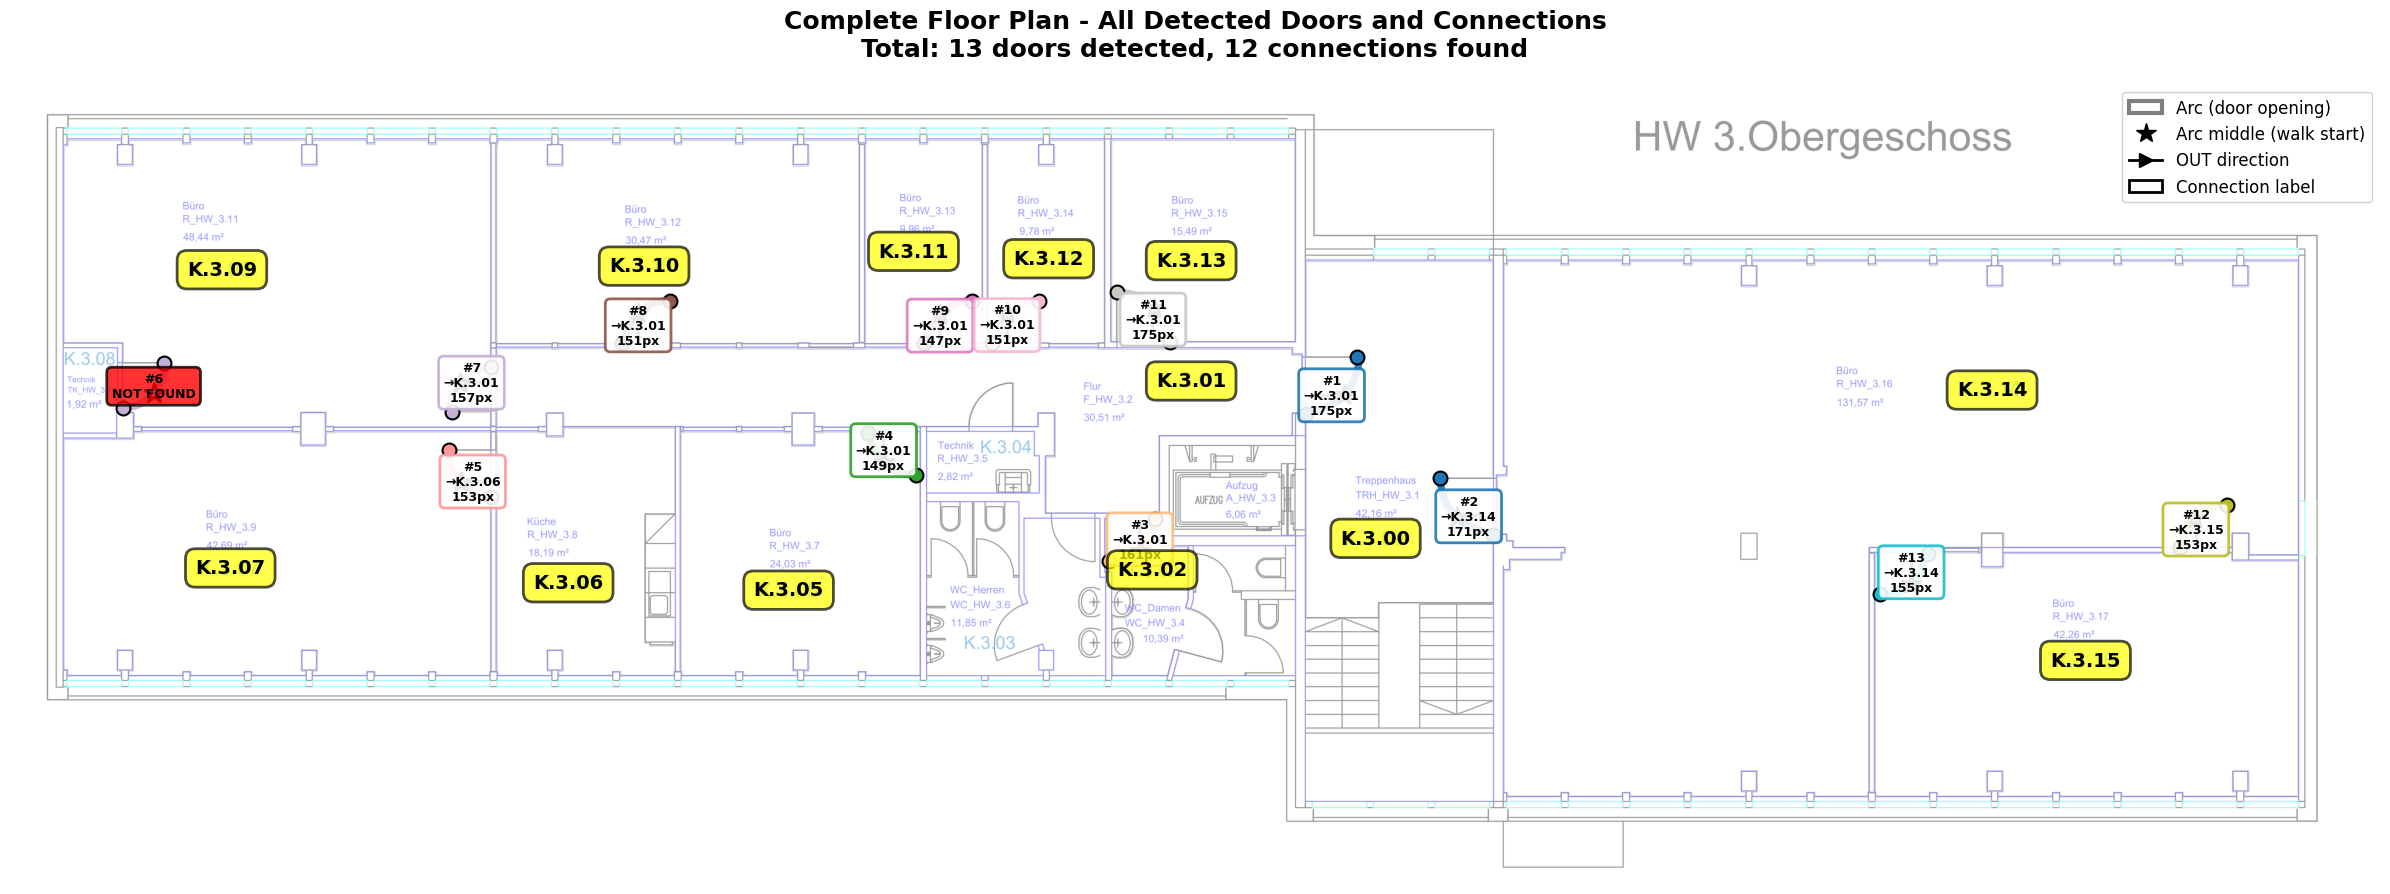

Visualization 1 complete: Floor plan overview with all 13 detected doors


In [28]:
# VISUALIZATION 1: Complete Floor Plan with ALL Detected Doors
fig, ax = plt.subplots(1, 1, figsize=(24, 16))

# Show floor plan
ax.imshow(image_rgb, alpha=0.4)

# Draw all room contours
for room_label, contour in room_contours.items():
    points = contour.reshape(-1, 2)
    ax.plot(points[:, 0], points[:, 1], 'gray', linewidth=1, alpha=0.3)

# Color map for rooms
room_colors = {}
cmap = plt.cm.get_cmap('tab20')
for i, room_label in enumerate(sorted(room_contours.keys())):
    room_colors[room_label] = cmap(i / len(room_contours))

# Draw each detected door with detailed annotations
door_number = 1
for room_label, doors in all_doors_final.items():
    contour = room_contours[room_label]
    points = contour.reshape(-1, 2)
    
    for door in doors:
        # Get arc points
        arc_start_idx = door['arc_start_idx']
        arc_end_idx = door['arc_end_idx']
        arc_middle_idx = door['arc_middle_idx']
        
        arc_start_point = points[arc_start_idx]
        arc_end_point = points[arc_end_idx]
        arc_middle_point = points[arc_middle_idx]
        
        # Draw arc in bold
        if arc_end_idx > arc_start_idx:
            arc_points = points[arc_start_idx:arc_end_idx+1]
        else:
            arc_points = np.vstack([points[arc_start_idx:], points[:arc_end_idx+1]])
        
        color = room_colors[room_label]
        ax.plot(arc_points[:, 0], arc_points[:, 1], color=color, linewidth=5, 
                alpha=0.9, zorder=10, label=f'{room_label}' if door == doors[0] else '')
        
        # Mark arc endpoints
        ax.scatter([arc_start_point[0]], [arc_start_point[1]], 
                  c=[color], s=100, marker='o', edgecolors='black', linewidth=1.5, zorder=15)
        ax.scatter([arc_end_point[0]], [arc_end_point[1]], 
                  c=[color], s=100, marker='o', edgecolors='black', linewidth=1.5, zorder=15)
        
        # Mark arc middle with star
        ax.scatter([arc_middle_point[0]], [arc_middle_point[1]], 
                  c=[color], s=200, marker='*', edgecolors='black', linewidth=2, zorder=20)
        
        # Draw OUT direction arrow if connection found
        if door['connected_room']:
            out_vec = door['out_direction']
            arrow_length = min(door['connection_distance'], 100)
            
            ax.arrow(arc_middle_point[0], arc_middle_point[1],
                    arrow_length * out_vec[0], arrow_length * out_vec[1],
                    head_width=15, head_length=10, fc=color, ec='black', 
                    linewidth=2, alpha=0.8, zorder=18)
            
            # Add connection label
            label_pos = arc_middle_point + (arrow_length/2) * out_vec
            ax.text(label_pos[0], label_pos[1], 
                   f'#{door_number}\n→{door["connected_room"]}\n{door["connection_distance"]}px',
                   fontsize=9, fontweight='bold', ha='center', va='center',
                   bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                            edgecolor=color, linewidth=2, alpha=0.9),
                   zorder=25)
        else:
            # Mark as not found
            ax.text(arc_middle_point[0], arc_middle_point[1] - 30, 
                   f'#{door_number}\nNOT FOUND',
                   fontsize=9, fontweight='bold', ha='center', va='center',
                   bbox=dict(boxstyle='round,pad=0.4', facecolor='red', 
                            edgecolor='black', linewidth=2, alpha=0.8),
                   zorder=25)
        
        door_number += 1

# Add room labels at centers
for label in room_labels:
    center_x, center_y = label['center']
    ax.text(center_x, center_y, label['text'], 
           fontsize=14, fontweight='bold', ha='center', va='center',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', 
                    edgecolor='black', linewidth=2, alpha=0.7),
           zorder=30)

ax.set_title('Complete Floor Plan - All Detected Doors and Connections\n' +
            f'Total: {total_doors_detected} doors detected, {successful_connections} connections found',
            fontsize=18, fontweight='bold', pad=20)
ax.axis('off')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='none', edgecolor='gray', linewidth=3, label='Arc (door opening)'),
    plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='black', 
               markersize=15, label='Arc middle (walk start)', markeredgecolor='black', markeredgewidth=1),
    plt.Line2D([0], [0], marker='>', color='black', markersize=10, 
               label='OUT direction', linestyle='-', linewidth=2),
    Patch(facecolor='white', edgecolor='black', linewidth=2, label='Connection label'),
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

print(f"Visualization 1 complete: Floor plan overview with all {total_doors_detected} detected doors")


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f

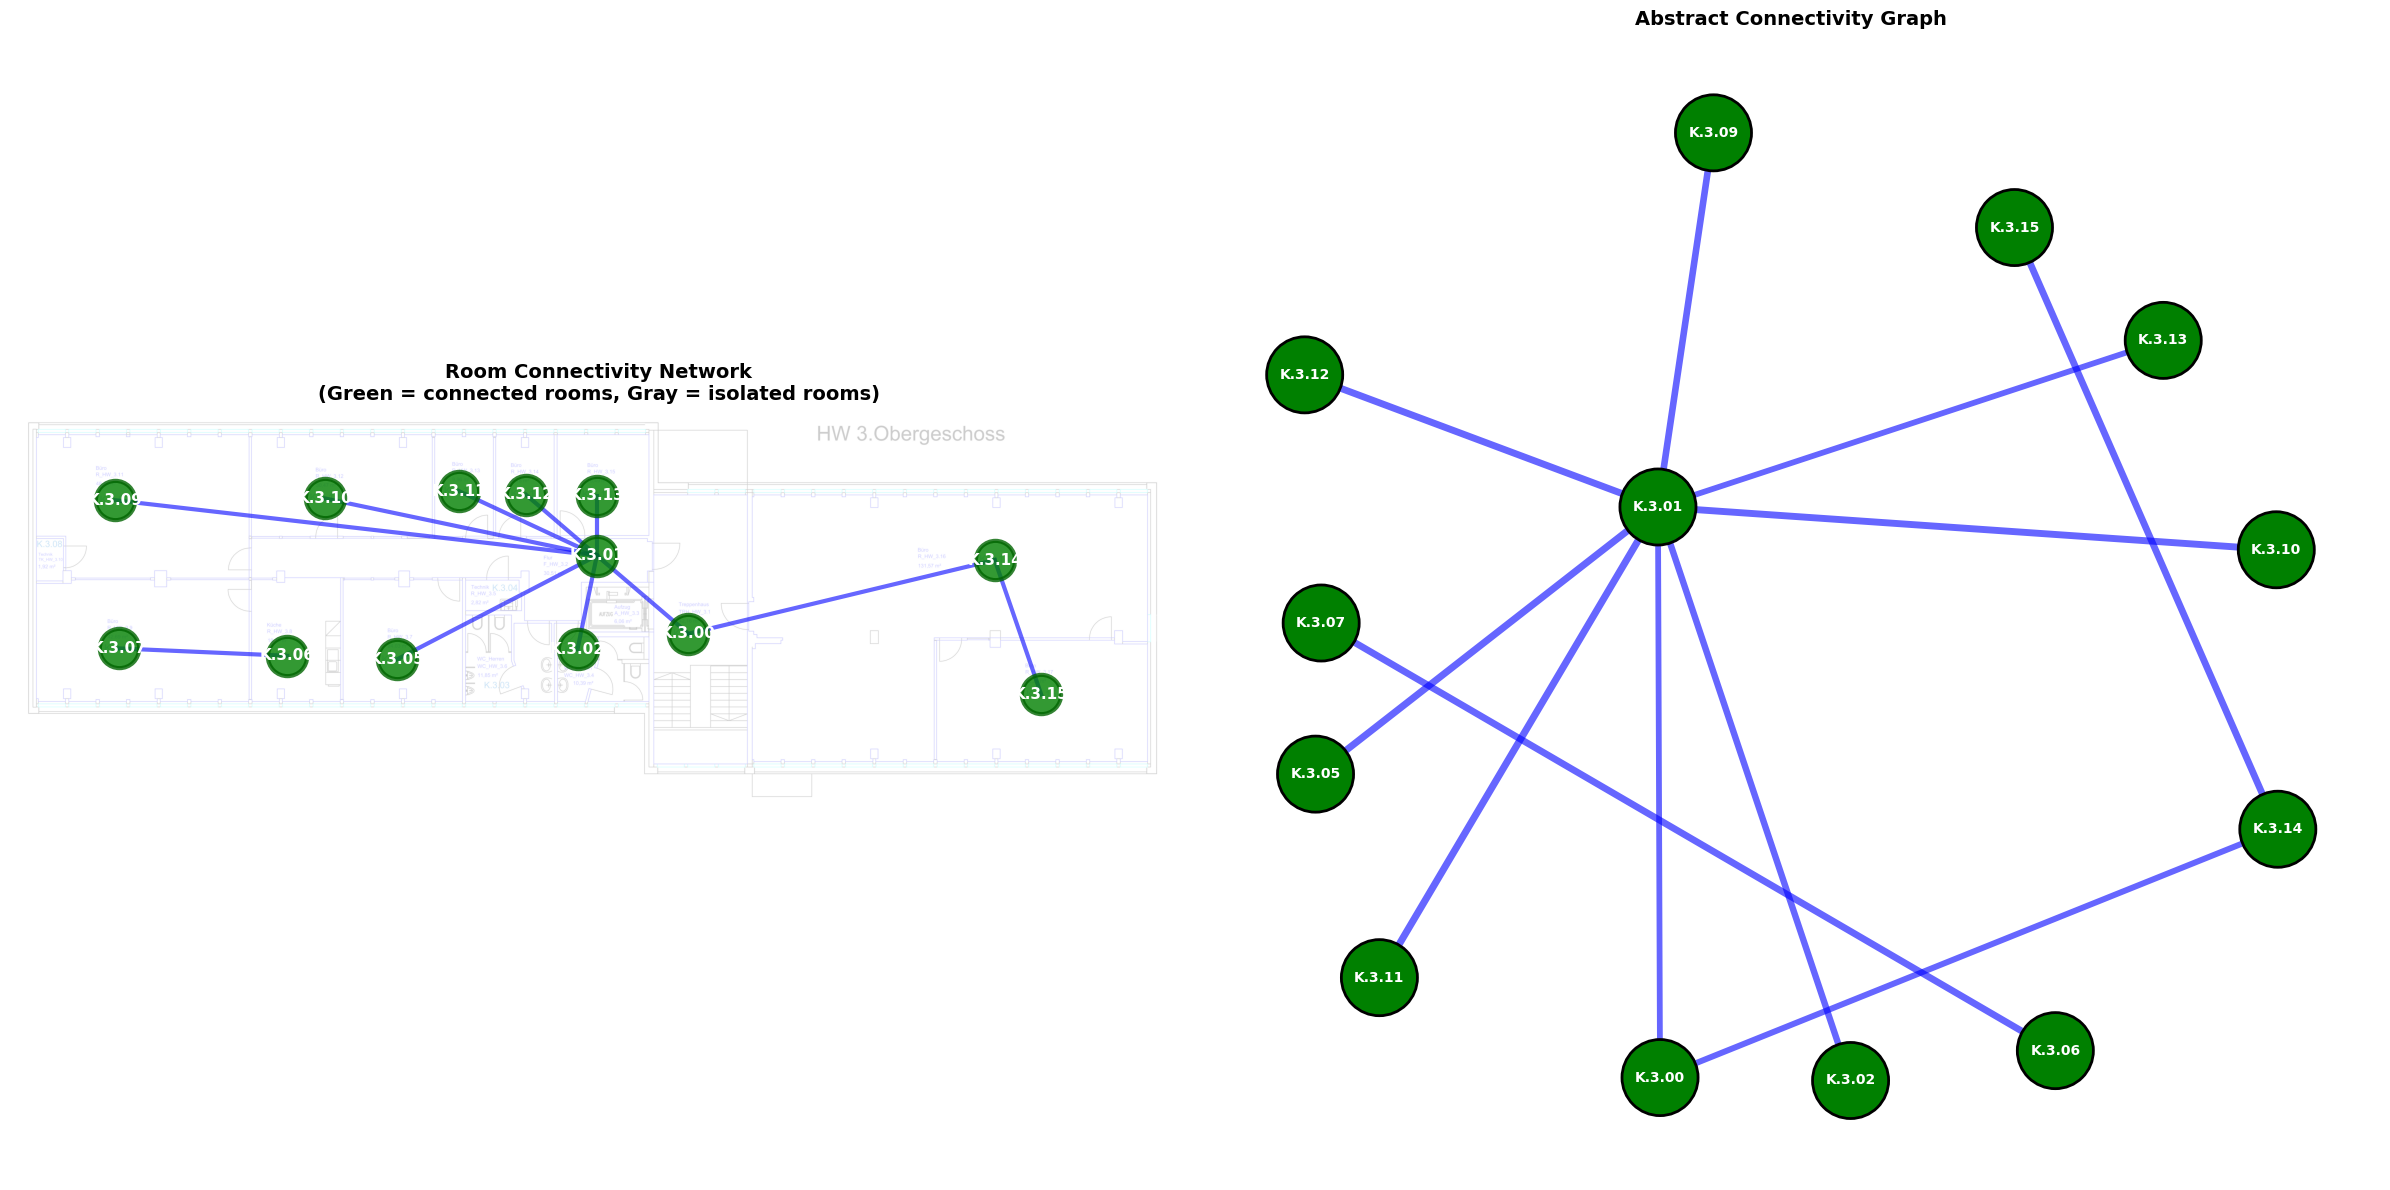

Visualization 2 complete: Network graph showing 11 connections


In [29]:
# VISUALIZATION 2: Network Graph showing Room Connectivity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

# Left plot: Network graph with actual floor plan positions
ax1.imshow(image_rgb, alpha=0.2)

# Use actual room center positions for graph layout
pos = {}
for label_info in room_labels:
    room_label = label_info['text']
    if room_label in G.nodes():
        pos[room_label] = label_info['center']

# Draw edges (connections)
for edge in G.edges():
    room1, room2 = edge
    if room1 in pos and room2 in pos:
        x1, y1 = pos[room1]
        x2, y2 = pos[room2]
        ax1.plot([x1, x2], [y1, y2], 'b-', linewidth=3, alpha=0.6, zorder=5)

# Draw nodes (rooms)
# Rooms are green if they have connections (degree > 0), gray if isolated
rooms_connected = [room for room in G.nodes() if G.degree(room) > 0]
rooms_isolated = [room for room in G.nodes() if G.degree(room) == 0]

for room in rooms_connected:
    if room in pos:
        x, y = pos[room]
        ax1.scatter([x], [y], s=800, c='green', marker='o', 
                   edgecolors='darkgreen', linewidth=3, zorder=20, alpha=0.8)
        ax1.text(x, y, room, fontsize=11, fontweight='bold', ha='center', va='center',
                color='white', zorder=25)

for room in rooms_isolated:
    if room in pos:
        x, y = pos[room]
        ax1.scatter([x], [y], s=800, c='lightgray', marker='o', 
                   edgecolors='gray', linewidth=3, zorder=20, alpha=0.8)
        ax1.text(x, y, room, fontsize=11, fontweight='bold', ha='center', va='center',
                color='black', zorder=25)

ax1.set_title('Room Connectivity Network\n(Green = connected rooms, Gray = isolated rooms)',
             fontsize=14, fontweight='bold')
ax1.axis('off')

# Right plot: Abstract network graph using spring layout
ax2.set_facecolor('#f0f0f0')

# Use spring layout for better visualization
pos_spring = nx.spring_layout(G, k=2, iterations=50, seed=42)

# Draw edges with varying thickness based on distance
edges = G.edges()
edge_colors = []
edge_widths = []
for edge in edges:
    edge_data = G[edge[0]][edge[1]]
    distance = edge_data['distance']
    # Thinner edges for longer distances
    edge_widths.append(max(1, 10 - distance / 30))
    edge_colors.append('blue')

nx.draw_networkx_edges(G, pos_spring, ax=ax2, width=edge_widths, 
                       edge_color=edge_colors, alpha=0.6)

# Draw nodes
node_colors = ['green' if G.degree(room) > 0 else 'lightgray' 
               for room in G.nodes()]
node_sizes = [3000 if G.degree(room) > 0 else 2000 for room in G.nodes()]

nx.draw_networkx_nodes(G, pos_spring, ax=ax2, node_color=node_colors, 
                       node_size=node_sizes, edgecolors='black', linewidths=2)

# Draw labels
nx.draw_networkx_labels(G, pos_spring, ax=ax2, font_size=10, 
                        font_weight='bold', font_color='white')

ax2.set_title('Abstract Connectivity Graph',
             fontsize=14, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

print(f"Visualization 2 complete: Network graph showing {G.number_of_edges()} connections")

In [30]:
# VISUALIZATION 3: Detailed Connection Table
print("=" * 100)
print("DETAILED CONNECTION TABLE - All Detected Doors")
print("=" * 100)
print()

# Create comprehensive connection data
connection_data = []
door_id = 1

for room_label in sorted(all_doors_final.keys()):
    doors = all_doors_final[room_label]
    
    for door in doors:
        connection_data.append({
            'id': door_id,
            'from': room_label,
            'to': door['connected_room'] if door['connected_room'] else 'NOT FOUND',
            'arc_length': door['arc_length'],
            'step': door['triangle_step'],
            'angle': door['angle_at_vertex'],
            'distance': door['connection_distance'] if door['connection_distance'] else '-',
            'status': '✓' if door['connected_room'] else '✗'
        })
        door_id += 1

# Print table header
print(f"{'ID':<4} {'From':<10} {'To':<12} {'Arc Len':<10} {'Step':<6} {'Angle':<8} {'Distance':<10} {'Status':<6}")
print("-" * 100)

# Print each connection
for conn in connection_data:
    dist_str = f"{conn['distance']}px" if isinstance(conn['distance'], int) else conn['distance']
    print(f"{conn['id']:<4} {conn['from']:<10} {conn['to']:<12} {conn['arc_length']:>7.1f}px  "
          f"{conn['step']:>4}   {conn['angle']:>6.1f}°  {dist_str:<10} {conn['status']:<6}")

print()
print("=" * 100)
print()

# Connection matrix (who connects to whom)
print("CONNECTION MATRIX")
print("=" * 100)
print()

all_rooms = sorted(room_contours.keys())
print(f"{'':>10}", end='')
for room in all_rooms:
    print(f"{room:<8}", end='')
print()
print("-" * (10 + len(all_rooms) * 8))

for room1 in all_rooms:
    print(f"{room1:>10}", end='')
    for room2 in all_rooms:
        if room1 == room2:
            mark = '-'
        elif G.has_edge(room1, room2):
            mark = '●'
        else:
            mark = ' '
        print(f"{mark:^8}", end='')
    print()

print()
print("Legend: ● = direct door connection, - = same room")
print("=" * 100)
print()

# Statistics by room
print("ROOM STATISTICS")
print("=" * 100)
print()
print(f"{'Room':<10} {'Doors':<7} {'Connected':<12} {'Neighbors':<30}")
print("-" * 100)

for room in sorted(all_rooms):
    doors = all_doors_final.get(room, [])
    num_doors = len(doors)
    num_connected = sum(1 for d in doors if d['connected_room'])
    neighbors = sorted([d['connected_room'] for d in doors if d['connected_room']])
    neighbor_str = ', '.join(neighbors) if neighbors else '(none)'
    
    print(f"{room:<10} {num_doors:^7} {num_connected:^12} {neighbor_str:<30}")

print()
print("=" * 100)


DETAILED CONNECTION TABLE - All Detected Doors

ID   From       To           Arc Len    Step   Angle    Distance   Status
----------------------------------------------------------------------------------------------------
1    K.3.00     K.3.01         388.7px     1     90.0°  175px      ✓     
2    K.3.00     K.3.14         379.8px    15     93.8°  171px      ✓     
3    K.3.02     K.3.01         319.1px     1     90.0°  161px      ✓     
4    K.3.05     K.3.01         314.6px     1     90.0°  149px      ✓     
5    K.3.07     K.3.06         311.0px     1     90.0°  153px      ✓     
6    K.3.09     NOT FOUND      302.0px     1     90.0°  -          ✗     
7    K.3.09     K.3.01         311.0px     1     90.0°  157px      ✓     
8    K.3.10     K.3.01         314.6px     1     90.0°  151px      ✓     
9    K.3.11     K.3.01         315.0px     1     90.0°  147px      ✓     
10   K.3.12     K.3.01         310.6px     1     90.0°  151px      ✓     
11   K.3.13     K.3.01         360.4p

In [31]:
# VISUALIZATION 4: Individual Room Details (rooms with doors only)
rooms_with_doors_list = [room for room, doors in all_doors_final.items() if doors]

# Create a grid of subplots
n_rooms = len(rooms_with_doors_list)
n_cols = 4
n_rows = (n_rooms + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 6 * n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)

for idx, room_label in enumerate(sorted(rooms_with_doors_list)):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]
    
    # Get room data
    contour = room_contours[room_label]
    points = contour.reshape(-1, 2)
    doors = all_doors_final[room_label]
    
    # Calculate bounds for zooming
    x_min, y_min = points.min(axis=0) - 150
    x_max, y_max = points.max(axis=0) + 150
    
    # Show floor plan background
    ax.imshow(image_rgb, alpha=0.3)
    
    # Draw room contour
    ax.plot(points[:, 0], points[:, 1], 'gray', linewidth=2, alpha=0.5)
    
    # Draw each door
    for door_idx, door in enumerate(doors):
        arc_start_idx = door['arc_start_idx']
        arc_end_idx = door['arc_end_idx']
        arc_middle_idx = door['arc_middle_idx']
        
        # Get arc points
        if arc_end_idx > arc_start_idx:
            arc_points = points[arc_start_idx:arc_end_idx+1]
        else:
            arc_points = np.vstack([points[arc_start_idx:], points[:arc_end_idx+1]])
        
        arc_middle_point = points[arc_middle_idx]
        
        # Draw arc
        color = 'green' if door['connected_room'] else 'red'
        ax.plot(arc_points[:, 0], arc_points[:, 1], color=color, 
               linewidth=4, alpha=0.9, zorder=10)
        
        # Draw arc middle star
        ax.scatter([arc_middle_point[0]], [arc_middle_point[1]], 
                  c=color, s=300, marker='*', edgecolors='black', 
                  linewidth=2, zorder=15)
        
        # Draw OUT direction arrow if connected
        if door['connected_room']:
            out_vec = door['out_direction']
            arrow_len = min(door['connection_distance'], 80)
            
            ax.arrow(arc_middle_point[0], arc_middle_point[1],
                    arrow_len * out_vec[0], arrow_len * out_vec[1],
                    head_width=12, head_length=8, fc='yellow', ec='black',
                    linewidth=2, alpha=0.8, zorder=12)
            
            # Add label - moved further away along the OUT direction vector
            label_offset = arrow_len * 4  # Move label 400% along the arrow
            label_pos = arc_middle_point + label_offset * out_vec
            ax.text(label_pos[0], label_pos[1],
                   f"→{door['connected_room']}",
                   fontsize=9, fontweight='bold', ha='center', va='center',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen',
                            edgecolor='darkgreen', linewidth=2, alpha=0.9),
                   zorder=20)
        else:
            # Mark as not found
            ax.text(arc_middle_point[0], arc_middle_point[1] - 30,
                   'NOT\nFOUND',
                   fontsize=9, fontweight='bold', ha='center', va='center',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='red',
                            edgecolor='darkred', linewidth=2, alpha=0.9),
                   zorder=20)
    
    # Set zoom
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_max, y_min)
    
    # Title with statistics
    connected_count = sum(1 for d in doors if d['connected_room'])
    title = f"{room_label}\n{len(doors)} door(s), {connected_count} connected"
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.axis('off')

# Hide empty subplots
for idx in range(n_rooms, n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    axes[row, col].axis('off')

plt.suptitle('Individual Room Details - Door Detection Results', 
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"Visualization 4 complete: Individual details for {n_rooms} rooms with detected doors")

findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f

Visualization 4 complete: Individual details for 11 rooms with detected doors


In [32]:
# FINAL SUMMARY: Key Insights and Export Data
print("\n" + "=" * 100)
print("FINAL ANALYSIS SUMMARY")
print("=" * 100)
print()

# Key findings
print("KEY FINDINGS:")
print("-" * 100)
print(f"✓ Successfully detected {total_doors_detected} doors across {len(room_contours)} rooms")
print(f"✓ Established {successful_connections} door connections")
print(f"✓ Identified {unique_connections} unique room-to-room connections")
print(f"✓ {len(rooms_with_doors_list)} rooms have detectable doors")
print(f"✓ {len(room_contours) - len(rooms_with_doors_list)} rooms have no detected doors (K.3.01, K.3.06)")
print()

# Connectivity analysis
print("CONNECTIVITY ANALYSIS:")
print("-" * 100)
components = list(nx.connected_components(G))
print(f"✓ Network has {len(components)} connected component(s):")
for i, component in enumerate(components, 1):
    rooms_in_component = sorted(list(component))
    print(f"  Component {i}: {len(rooms_in_component)} rooms - {', '.join(rooms_in_component)}")
print()

# Hub analysis (rooms with most connections)
print("HUB ROOMS (most connections):")
print("-" * 100)
degree_dict = dict(G.degree())
sorted_by_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
for room, degree in sorted_by_degree[:5]:
    neighbors = sorted(list(G.neighbors(room)))
    print(f"  {room}: {degree} connection(s) → {', '.join(neighbors)}")
print()

# Algorithm performance
print("ALGORITHM PERFORMANCE:")
print("-" * 100)
angles = [door['angle_at_vertex'] for doors in all_doors_final.values() 
         for door in doors]
steps = [door['triangle_step'] for doors in all_doors_final.values() 
        for door in doors]
distances = [door['connection_distance'] for doors in all_doors_final.values() 
            for door in doors if door['connection_distance']]

print(f"✓ Triangle angles: min={min(angles):.1f}°, max={max(angles):.1f}°, avg={np.mean(angles):.1f}°")
print(f"✓ Steps to find triangle: min={min(steps)}, max={max(steps)}, avg={np.mean(steps):.1f}")
print(f"✓ Walk distances: min={min(distances)}px, max={max(distances)}px, avg={np.mean(distances):.1f}px")
print(f"✓ Success rate: {successful_connections}/{total_doors_detected} ({100*successful_connections/total_doors_detected:.1f}%)")
print()

# Export to JSON
print("EXPORTING DATA:")
print("-" * 100)

export_data = {
    'summary': {
        'total_rooms': len(room_contours),
        'total_doors_detected': total_doors_detected,
        'successful_connections': successful_connections,
        'unique_connections': unique_connections
    },
    'connections': [],
    'graph_edges': []
}

# Export individual connections
for room_label, doors in all_doors_final.items():
    for door in doors:
        export_data['connections'].append({
            'from_room': room_label,
            'to_room': door['connected_room'],
            'arc_length_px': float(door['arc_length']),
            'triangle_step': int(door['triangle_step']),
            'angle_degrees': float(door['angle_at_vertex']),
            'walk_distance_px': door['connection_distance'] if door['connection_distance'] else None
        })

# Export graph edges (deduplicated)
for edge in G.edges(data=True):
    export_data['graph_edges'].append({
        'room1': edge[0],
        'room2': edge[1],
        'distance_px': edge[2]['distance'],
        'arc_length_px': edge[2]['arc_length'],
        'angle_degrees': edge[2]['angle']
    })

# Save to JSON
import json
output_json = Path('data/room_connectivity_graph.json')
with open(output_json, 'w') as f:
    json.dump(export_data, f, indent=2)

print(f"✓ Exported connectivity data to: {output_json}")

# Save to GraphML (for network analysis tools)
output_graphml = Path('data/room_connectivity_graph.graphml')
nx.write_graphml(G, str(output_graphml))
print(f"✓ Exported network graph to: {output_graphml}")

print()
print("=" * 100)
print("ANALYSIS COMPLETE!")
print("=" * 100)
print()
print("You can now:")
print("  1. Review the visualizations above to verify door detection accuracy")
print("  2. Check the connection table to validate room-to-room connections")
print("  3. Use the exported JSON/GraphML files for further analysis")
print("  4. Manually verify connections against the floor plan")
print()



FINAL ANALYSIS SUMMARY

KEY FINDINGS:
----------------------------------------------------------------------------------------------------
✓ Successfully detected 13 doors across 13 rooms
✓ Established 12 door connections
✓ Identified 11 unique room-to-room connections
✓ 11 rooms have detectable doors
✓ 2 rooms have no detected doors (K.3.01, K.3.06)

CONNECTIVITY ANALYSIS:
----------------------------------------------------------------------------------------------------
✓ Network has 2 connected component(s):
  Component 1: 11 rooms - K.3.00, K.3.01, K.3.02, K.3.05, K.3.09, K.3.10, K.3.11, K.3.12, K.3.13, K.3.14, K.3.15
  Component 2: 2 rooms - K.3.06, K.3.07

HUB ROOMS (most connections):
----------------------------------------------------------------------------------------------------
  K.3.01: 8 connection(s) → K.3.00, K.3.02, K.3.05, K.3.09, K.3.10, K.3.11, K.3.12, K.3.13
  K.3.14: 2 connection(s) → K.3.00, K.3.15
  K.3.00: 2 connection(s) → K.3.01, K.3.14
  K.3.09: 1 connect

In [ ]:
# STEP 1: Door Geometry - Quarter-Circle Arc Structure
# Visualize the geometric structure of a typical door in a floor plan

# Select a good example door for visualization
example_room = 'K.3.05'  # Room with a clear door
example_door = all_doors_final[example_room][0]

# Get room contour and door information
contour = room_contours[example_room]
points = contour.reshape(-1, 2)
curvature = room_curvatures[example_room]

arc_start_idx = example_door['arc_start_idx']
arc_end_idx = example_door['arc_end_idx']
arc_middle_idx = example_door['arc_middle_idx']

# Extract arc points
if arc_end_idx > arc_start_idx:
    arc_points = points[arc_start_idx:arc_end_idx+1]
else:
    arc_points = np.vstack([points[arc_start_idx:], points[:arc_end_idx+1]])

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# Panel 1: Door geometry with annotations
ax1 = axes[0]
ax1.imshow(image_rgb, alpha=0.2)

# Zoom to door area
margin = 200
x_min = arc_points[:, 0].min() - margin
x_max = arc_points[:, 0].max() + margin
y_min = arc_points[:, 1].min() - margin
y_max = arc_points[:, 1].max() + margin

# Draw room contour
ax1.plot(points[:, 0], points[:, 1], 'gray', linewidth=3, alpha=0.6, label='Room boundary')

# Draw the arc (door)
ax1.plot(arc_points[:, 0], arc_points[:, 1], 'red', linewidth=6, alpha=0.9, label='Door arc (quarter-circle)')

# Mark arc endpoints
ax1.scatter([points[arc_start_idx][0]], [points[arc_start_idx][1]], 
           c='blue', s=400, marker='o', edgecolors='darkblue', linewidth=3, zorder=10, label='Arc start')
ax1.scatter([points[arc_end_idx][0]], [points[arc_end_idx][1]], 
           c='green', s=400, marker='o', edgecolors='darkgreen', linewidth=3, zorder=10, label='Arc end')
ax1.scatter([points[arc_middle_idx][0]], [points[arc_middle_idx][1]], 
           c='orange', s=500, marker='*', edgecolors='black', linewidth=2, zorder=10, label='Arc middle')

# Draw wall segments (before and after arc)
wall_length = 50
before_idx = arc_start_idx - wall_length if arc_start_idx >= wall_length else 0
after_idx = min(arc_end_idx + wall_length, len(points) - 1)

wall_before = points[before_idx:arc_start_idx+1]
wall_after = points[arc_end_idx:after_idx+1]

ax1.plot(wall_before[:, 0], wall_before[:, 1], 'purple', linewidth=5, alpha=0.8, label='Wall segment 1')
ax1.plot(wall_after[:, 0], wall_after[:, 1], 'cyan', linewidth=5, alpha=0.8, label='Wall segment 2')

ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_max, y_min)
ax1.set_title('Door Structure: Quarter-Circle Arc\nConnecting Two Perpendicular Walls', 
             fontsize=13, fontweight='bold')
ax1.legend(loc='upper right', fontsize=9)
ax1.axis('off')

# Panel 2: Curvature visualization
ax2 = axes[1]
ax2.imshow(image_rgb, alpha=0.2)

# Color-code points by curvature
curvature_colors = np.zeros((len(points), 3))
for i, curv in enumerate(curvature):
    if 0.03 <= curv <= 0.1:  # Door range
        curvature_colors[i] = [1, 0, 0]  # Red for door-like curvature
    elif curv > 0.1:
        curvature_colors[i] = [1, 0.5, 0]  # Orange for high curvature
    elif curv < 0:
        curvature_colors[i] = [0, 0, 1]  # Blue for convex
    else:
        curvature_colors[i] = [0.5, 0.5, 0.5]  # Gray for flat

# Draw contour with curvature colors
for i in range(len(points) - 1):
    ax2.plot([points[i, 0], points[i+1, 0]], 
            [points[i, 1], points[i+1, 1]], 
            color=curvature_colors[i], linewidth=3, alpha=0.8)

# Highlight detected arc
ax2.plot(arc_points[:, 0], arc_points[:, 1], 'yellow', linewidth=6, alpha=0.9, 
        linestyle='--', label=f'Detected arc ({len(arc_points)} points)')

ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_max, y_min)
ax2.set_title('Curvature Detection\n(Red = Door-like curvature 0.03-0.1)', 
             fontsize=13, fontweight='bold')
ax2.legend(loc='upper right', fontsize=9)
ax2.axis('off')

# Panel 3: Curvature plot
ax3 = axes[2]
indices = np.arange(len(curvature))
ax3.plot(indices, curvature, 'gray', linewidth=1, alpha=0.5, label='Raw curvature')
ax3.axhline(y=0.03, color='green', linestyle='--', linewidth=2, label='Min threshold (0.03)')
ax3.axhline(y=0.1, color='red', linestyle='--', linewidth=2, label='Max threshold (0.1)')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.3)

# Highlight arc region
arc_region = np.zeros(len(curvature))
arc_region[arc_start_idx:arc_end_idx+1] = curvature[arc_start_idx:arc_end_idx+1]
ax3.fill_between(indices, 0, arc_region, where=(arc_region > 0), 
                color='red', alpha=0.3, label='Detected door arc')

ax3.set_xlabel('Boundary Point Index', fontsize=11, fontweight='bold')
ax3.set_ylabel('Signed Curvature', fontsize=11, fontweight='bold')
ax3.set_title('Curvature Signal Along Boundary\n(Positive = Concave/Door-like)', 
             fontsize=13, fontweight='bold')
ax3.legend(loc='upper right', fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(-0.05, 0.15)

plt.tight_layout()
plt.show()

print(f"Example door from {example_room}:")
print(f"  Arc length: {example_door['arc_length']:.1f} pixels")
print(f"  Arc spans: {arc_end_idx - arc_start_idx} boundary points")
print(f"  Average curvature in arc: {curvature[arc_start_idx:arc_end_idx+1].mean():.4f}")

findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f

Example door from K.3.05:
  Arc length: 314.6 pixels
  Arc spans: 269 boundary points
  Average curvature in arc: 0.0062


In [48]:
# STEP 2: Projection-Based Triangle Detection
# Visualize how the algorithm finds the 90° angle by walking and projecting

# Use the same example door
triangle_step = example_door['triangle_step']
angle_found = example_door['angle_at_vertex']

# Recreate the walking process
n = len(points)
fig, axes = plt.subplots(2, 3, figsize=(22, 14))

# Show first few steps of the walking process
steps_to_show = [1, 3, 5, 10, 15, triangle_step]

for idx, step in enumerate(steps_to_show):
    if idx >= 6:
        break
    
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    ax.imshow(image_rgb, alpha=0.2)
    
    # Get forward and backward points
    forward_idx = (arc_end_idx + step) % n
    backward_idx = (arc_start_idx - step) % n
    
    fwd_pt = points[forward_idx]
    bwd_pt = points[backward_idx]
    
    # Draw room contour (faded)
    ax.plot(points[:, 0], points[:, 1], 'lightgray', linewidth=2, alpha=0.3)
    
    # Draw arc
    ax.plot(arc_points[:, 0], arc_points[:, 1], 'red', linewidth=5, alpha=0.9)
    
    # Draw arc endpoints
    ax.scatter([points[arc_start_idx][0]], [points[arc_start_idx][1]], 
              c='blue', s=30, marker='o', edgecolors='blue', linewidth=2, zorder=10)
    ax.scatter([points[arc_end_idx][0]], [points[arc_end_idx][1]], 
              c='blue', s=30, marker='o', edgecolors='blue', linewidth=2, zorder=10)
    
    # Draw walked points
    ax.scatter([bwd_pt[0]], [bwd_pt[1]], c='blue', s=30, marker='s', 
              edgecolors='blue', linewidth=2, zorder=10, label=f'Backward step {step}')
    ax.scatter([fwd_pt[0]], [fwd_pt[1]], c='blue', s=30, marker='s', 
              edgecolors='blue', linewidth=2, zorder=10, label=f'Forward step {step}')
    
    # Draw projection vectors
    vec1 = bwd_pt - points[arc_start_idx]
    vec2 = fwd_pt - points[arc_end_idx]
    
    ax.arrow(points[arc_start_idx][0], points[arc_start_idx][1], 
            vec1[0], vec1[1], 
            head_width=15, head_length=10, fc='purple', ec='darkviolet', 
            linewidth=3, alpha=0.7, zorder=8, label='Vector 1')
    
    ax.arrow(points[arc_end_idx][0], points[arc_end_idx][1], 
            vec2[0], vec2[1], 
            head_width=15, head_length=10, fc='cyan', ec='darkcyan', 
            linewidth=3, alpha=0.7, zorder=8, label='Vector 2')
    
    # Calculate angle between vectors
    vec1_norm = vec1 / np.linalg.norm(vec1)
    vec2_norm = vec2 / np.linalg.norm(vec2)
    dot_product = np.dot(vec1_norm, vec2_norm)
    angle = np.degrees(np.arccos(np.clip(dot_product, -1.0, 1.0)))
    
    # Draw the angle arc between vectors
    if step == triangle_step:
        # This is the winning step - highlight it
        ax.set_facecolor('#ffffcc')
        title_color = 'darkgreen'
        title = f'✓ Step {step}: TRIANGLE FOUND!\nAngle = {angle:.2f}° (target: 90°±4°)'
    else:
        title_color = 'black'
        title = f'Step {step}: Angle = {angle:.2f}°'
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_max, y_min)
    ax.set_title(title, fontsize=12, fontweight='bold', color=title_color)
    ax.axis('off')

plt.suptitle('Projection-Based Triangle Detection: Walking Process\n' + 
            'Vectors from arc endpoints to walked points form ~90° angle when perpendicular walls are found',
            fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\nTriangle Detection Results:")
print(f"  Triangle found at step: {triangle_step}")
print(f"  Angle at vertex: {angle_found:.2f}°")
print(f"  Angular deviation from 90°: {abs(angle_found - 90):.2f}°")

findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f


Triangle Detection Results:
  Triangle found at step: 1
  Angle at vertex: 90.00°
  Angular deviation from 90°: 0.00°
